In [1]:
stage = 'train'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys
sys.path.append('modules')

In [4]:
import importlib
import data
import dictionary

In [5]:
importlib.reload(sys.modules['data'])
importlib.reload(sys.modules['dictionary'])

<module 'dictionary' from '/Users/vladparakhin/Documents/GitHub/ML_Gradient_Boosting_Classifier/modules/dictionary.py'>

In [6]:
from data import set_filepath, test_loc, percent_missing, display_test, group_colors, \
    normalize_color, further_normalize_color, jeep_transmission_replacement, \
    jeep_bin_drive_type, jeep_trim_replacement, bucket_ratings, bucket_sellers, bucket_listing_sources \

from dictionary import cad_engine_replacement_rules, jeep_engine_replacement_rules, \
    replacement_rules_transmission, replacement_rules_drivetrain, cad_trim_replacement_rules

In [7]:
eda_dataset, data_transform_ds, transform_categorical_clean, \
transform_numerical_clean, transform_final = set_filepath(stage)

print(f"eda_dataset: {eda_dataset}")
print(f"data_transform_ds: {data_transform_ds}")
print(f"transform_categorical_clean: {transform_categorical_clean}")
print(f"transform_numerical_clean: {transform_numerical_clean}")
print(f"transform_final: {transform_final}")

eda_dataset: data/Training_DataSet.csv
data_transform_ds: data/Training_DataSet.csv
transform_categorical_clean: data/final/train_categorical_clean.csv
transform_numerical_clean: data/final/train_numerical_clean.csv
transform_final: data/final/train_final_clean.csv


# (EDA) Exploratory Data Analysis

In [8]:
df_initial = pd.read_csv(eda_dataset)

In [9]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ListingID             6298 non-null   int64  
 1   SellerCity            6298 non-null   object 
 2   SellerIsPriv          6298 non-null   bool   
 3   SellerListSrc         6296 non-null   object 
 4   SellerName            6298 non-null   object 
 5   SellerRating          6298 non-null   float64
 6   SellerRevCnt          6298 non-null   int64  
 7   SellerState           6298 non-null   object 
 8   SellerZip             6296 non-null   float64
 9   VehBodystyle          6298 non-null   object 
 10  VehCertified          6298 non-null   bool   
 11  VehColorExt           6225 non-null   object 
 12  VehColorInt           5570 non-null   object 
 13  VehDriveTrain         5897 non-null   object 
 14  VehEngine             5937 non-null   object 
 15  VehFeats             

In [10]:
len(df_initial)

6298

In [11]:
len(df_initial.columns)

29

In [12]:
print(df_initial.columns)

Index(['ListingID', 'SellerCity', 'SellerIsPriv', 'SellerListSrc',
       'SellerName', 'SellerRating', 'SellerRevCnt', 'SellerState',
       'SellerZip', 'VehBodystyle', 'VehCertified', 'VehColorExt',
       'VehColorInt', 'VehDriveTrain', 'VehEngine', 'VehFeats', 'VehFuel',
       'VehHistory', 'VehListdays', 'VehMake', 'VehMileage', 'VehModel',
       'VehPriceLabel', 'VehSellerNotes', 'VehType', 'VehTransmission',
       'VehYear', 'Vehicle_Trim', 'Dealer_Listing_Price'],
      dtype='object')


In [13]:
df_numerical_data = df_initial.select_dtypes(include=[np.number])

Here we can have a look at numerical data, and potentially handle the outliers

In [14]:
df_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ListingID             6298 non-null   int64  
 1   SellerRating          6298 non-null   float64
 2   SellerRevCnt          6298 non-null   int64  
 3   SellerZip             6296 non-null   float64
 4   VehListdays           6296 non-null   float64
 5   VehMileage            6296 non-null   float64
 6   VehYear               6298 non-null   int64  
 7   Dealer_Listing_Price  6246 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 393.8 KB


Some colums are meaninfull, let's drop them

In [15]:
df_numerical_data = df_numerical_data.drop(['ListingID','SellerZip'], axis=1)

In [16]:
df_numerical_data.describe()

,SellerRating,SellerRevCnt,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
count,6298.000000,6298.000000,6296.000000,6296.000000,6298.000000,6246.000000
mean,4.138346,434.565576,56.143670,26369.364358,2016.792633,32265.053314
std,1.188033,1274.257411,68.301329,13036.568712,1.206566,7538.339005
min,0.000000,0.000000,0.293102,0.000000,2015.000000,18289.000000
25%,4.000000,28.000000,12.998391,16835.000000,2015.000000,26900.000000
50%,4.600000,126.000000,33.463484,26181.000000,2017.000000,31455.500000
75%,4.800000,401.000000,74.139769,36468.500000,2018.000000,35991.000000
max,5.000000,14635.000000,820.684375,83037.000000,2019.000000,89500.000000


Looking for the correlation between the numerical columns

In [17]:
df_numerical_data.corr()

,SellerRating,SellerRevCnt,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
SellerRating,1.000000,0.145665,0.008485,-0.027481,0.060144,0.050542
SellerRevCnt,0.145665,1.000000,-0.016713,-0.006529,0.029543,-0.021295
VehListdays,0.008485,-0.016713,1.000000,-0.072298,0.022996,0.020701
VehMileage,-0.027481,-0.006529,-0.072298,1.000000,-0.518410,-0.562846
VehYear,0.060144,0.029543,0.022996,-0.518410,1.000000,0.601120
Dealer_Listing_Price,0.050542,-0.021295,0.020701,-0.562846,0.601120,1.000000


<Axes: >

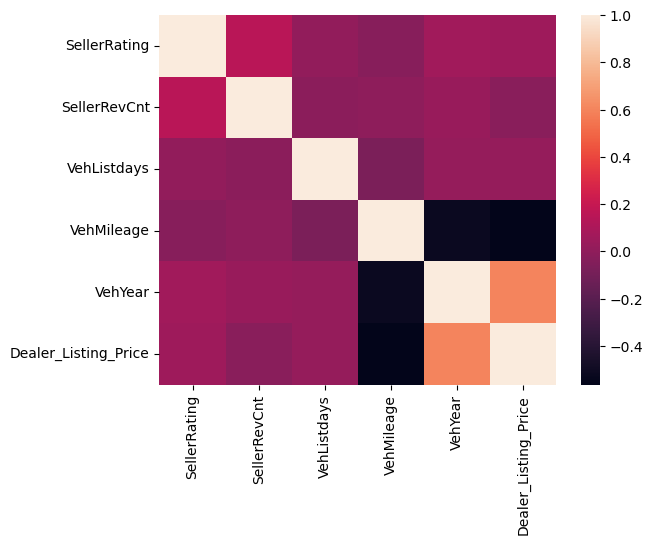

In [18]:
sns.heatmap(df_numerical_data.corr())

In [19]:
try:
    if 'Dealer_Listing_Price' in df_numerical_data.columns:
        df_numerical_data.corr()['Dealer_Listing_Price'].sort_values()
    else:
        print("Column 'Dealer_Listing_Price' not found. Skipping this cell.")
except NameError:
    print("DataFrame 'df' not defined. Skipping this cell.")

It's interesting that mileage has the lowest correlation with the price. Interesting, why?

Visually checking some data to understand potential outliers

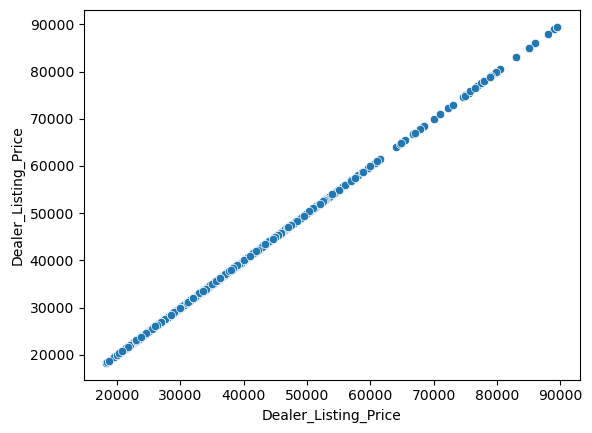

In [20]:
try:
    if 'Dealer_Listing_Price' in df_numerical_data.columns:
        sns.scatterplot(data=df_numerical_data,x='Dealer_Listing_Price',y='Dealer_Listing_Price');
    else:
        print("Column 'Dealer_Listing_Price' not found. Skipping this cell.")
except NameError:
    print("DataFrame 'df' not defined. Skipping this cell.")
except ValueError as e:
    print(f"ValueError: {e}. Skipping this cell.")

In [21]:
try:
    if 'Dealer_Listing_Price' in df_numerical_data.columns:
        price_distribution = df_initial['Dealer_Listing_Price']
    else:
        print("Column 'Dealer_Listing_Price' not found. Skipping this cell.")
except KeyError:
    print("KeyError: 'Dealer_Listing_Price' not found. Skipping this cell.")
except NameError:
    print("DataFrame 'df' not defined. Skipping this cell.")
except ValueError as e:
    print(f"ValueError: {e}. Skipping this cell.")

In [22]:
try:
    if 'Dealer_Listing_Price' in df_numerical_data.columns:
        price_distribution = df_initial['Dealer_Listing_Price']
    else:
        print("Column 'Dealer_Listing_Price' not found. Skipping this cell.")
except KeyError:
    print("KeyError: 'Dealer_Listing_Price' not found. Skipping this cell.")
except NameError:
    print(f"DataFrame {price_distribution} not defined. Skipping this cell.")
except ValueError as e:
    print(f"ValueError: {e}. Skipping this cell.")

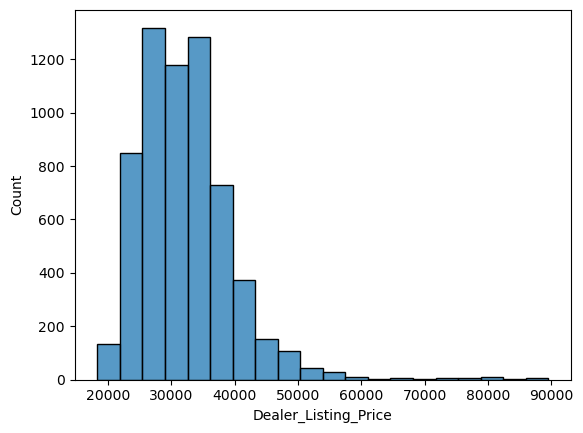

In [23]:
try:
    price_distribution = price_distribution.dropna()
    sns.histplot(price_distribution, bins=20, kde=False)
except NameError:
    print("Variable 'price_distribution' is not defined. Skipping this cell.")

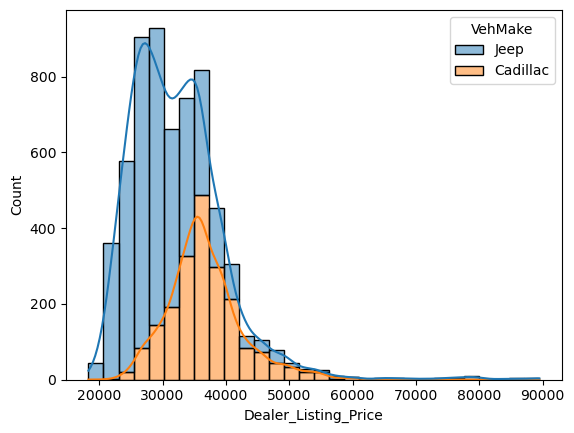

In [24]:
try:
    if 'Dealer_Listing_Price' in df_initial.columns:
        price_distribution = df_initial.dropna(subset=['Dealer_Listing_Price'])
        sns.histplot(data=price_distribution, x='Dealer_Listing_Price', hue='VehMake', bins=30, kde=True, multiple='stack')
    else:
        print("Column 'Dealer_Listing_Price' not found. Skipping this cell.")
except NameError:
    print("Variable 'df_initial' is not defined. Skipping this cell.")


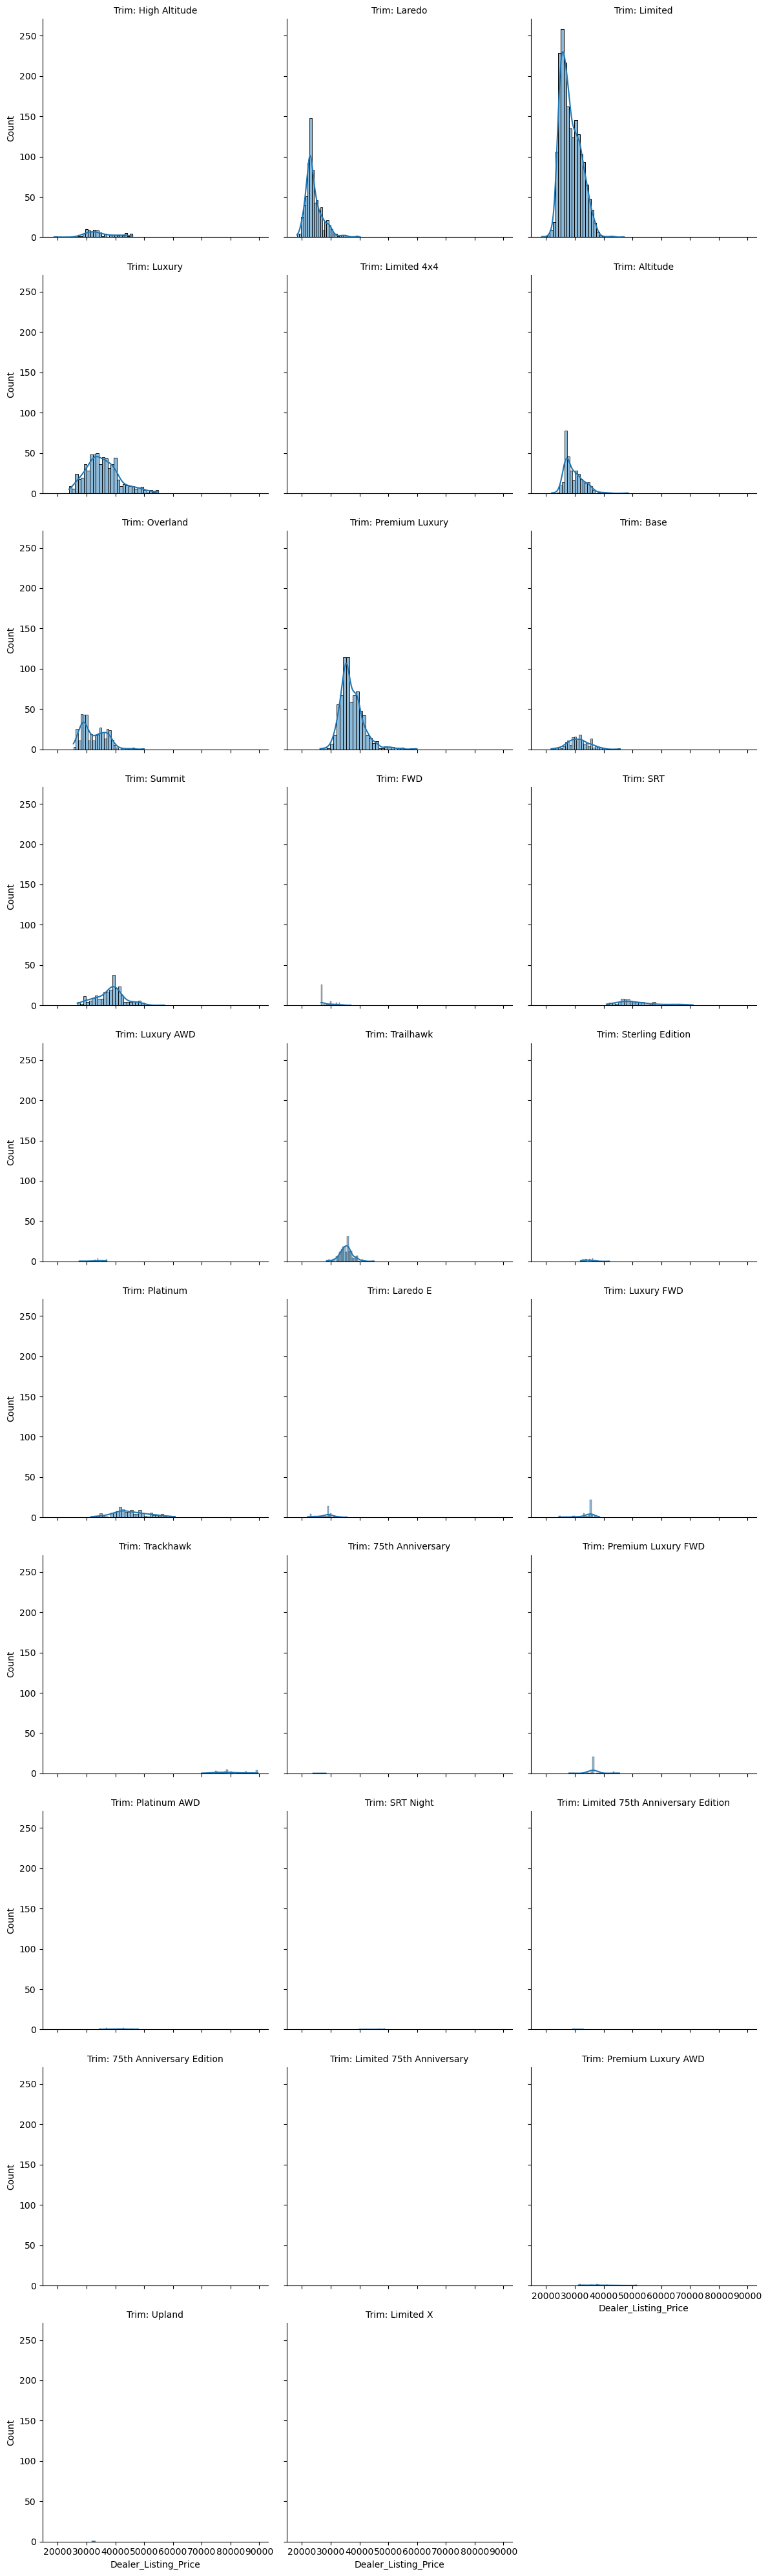

In [25]:
try:
    if 'Dealer_Listing_Price' in df_initial.columns:
        price_distribution = df_initial.dropna(subset=['Dealer_Listing_Price'])
        g = sns.FacetGrid(price_distribution, col="Vehicle_Trim", col_wrap=3, sharex=True, sharey=True, height=4)
        g.map_dataframe(sns.histplot, x='Dealer_Listing_Price', bins=30, kde=True)

        g.set_axis_labels("Dealer_Listing_Price", "Count")
        g.set_titles("Trim: {col_name}")
        plt.show()
    else:
        print("Column 'Dealer_Listing_Price' not found. Skipping this cell.")
except NameError:
    print("Variable 'df_initial' is not defined. Skipping this cell.")


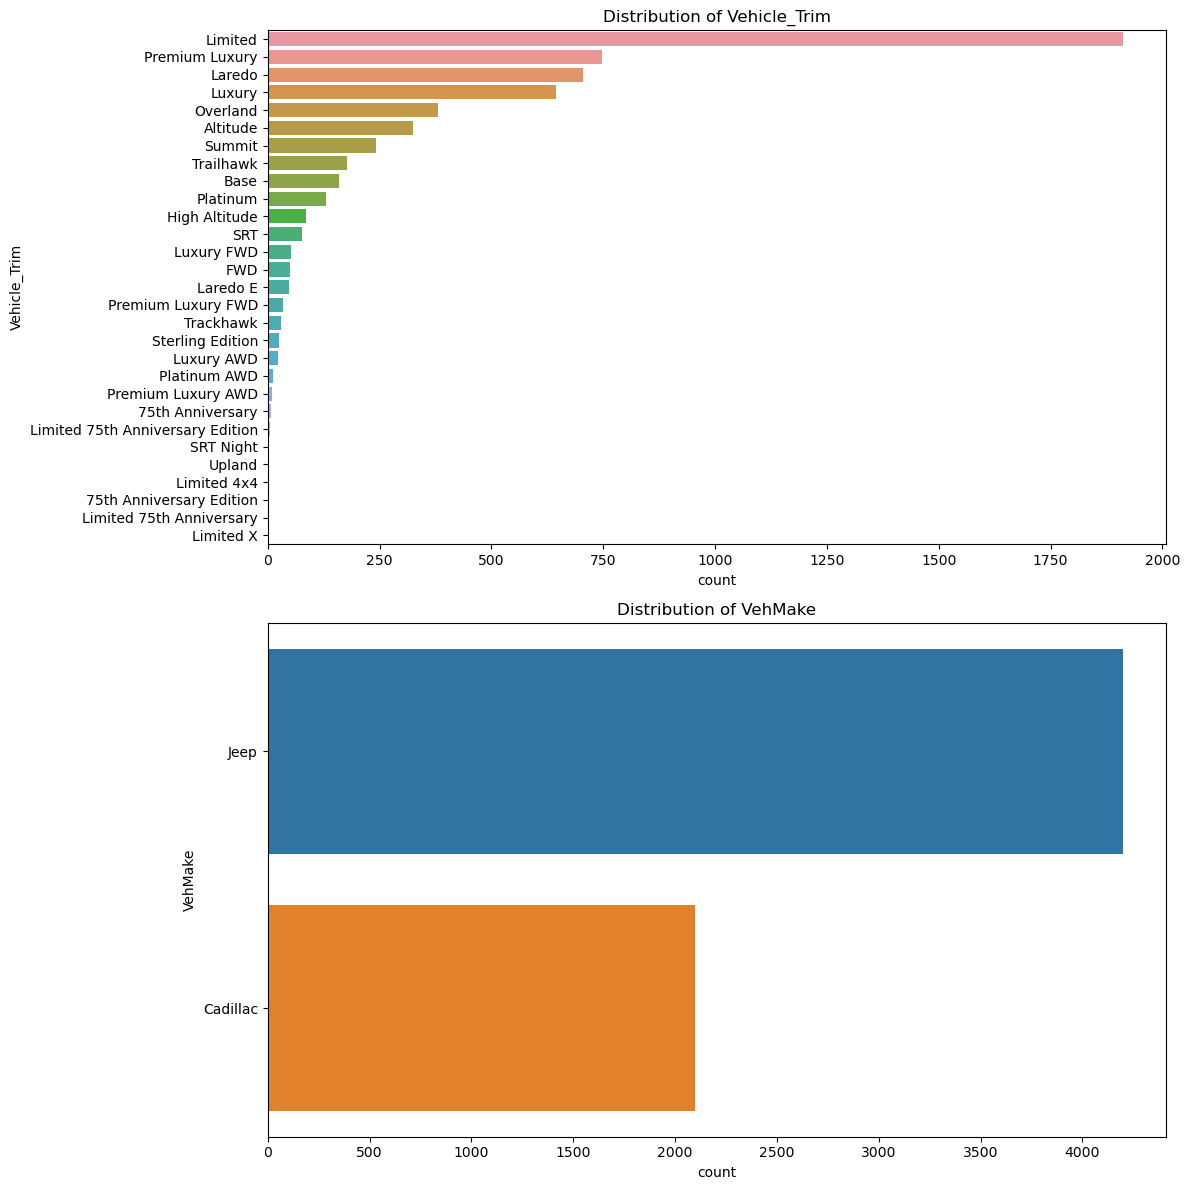

In [26]:
try:
    if 'Vehicle_Trim' in df_initial.columns and 'VehMake' in df_initial.columns:
        fig, ax = plt.subplots(nrows=2, figsize=(12, 12))

        sns.countplot(data=df_initial, y='Vehicle_Trim', ax=ax[0], order=df_initial['Vehicle_Trim'].value_counts().index)
        ax[0].set_title('Distribution of Vehicle_Trim')

        sns.countplot(data=df_initial, y='VehMake', ax=ax[1], order=df_initial['VehMake'].value_counts().index)
        ax[1].set_title('Distribution of VehMake')

        plt.tight_layout()
        plt.show()
    else:
        print("One or both of the columns 'Vehicle_Trim' and 'VehMake' not found. Skipping this cell.")
except NameError:
    print("Variable 'df_initial' is not defined. Skipping this cell.")

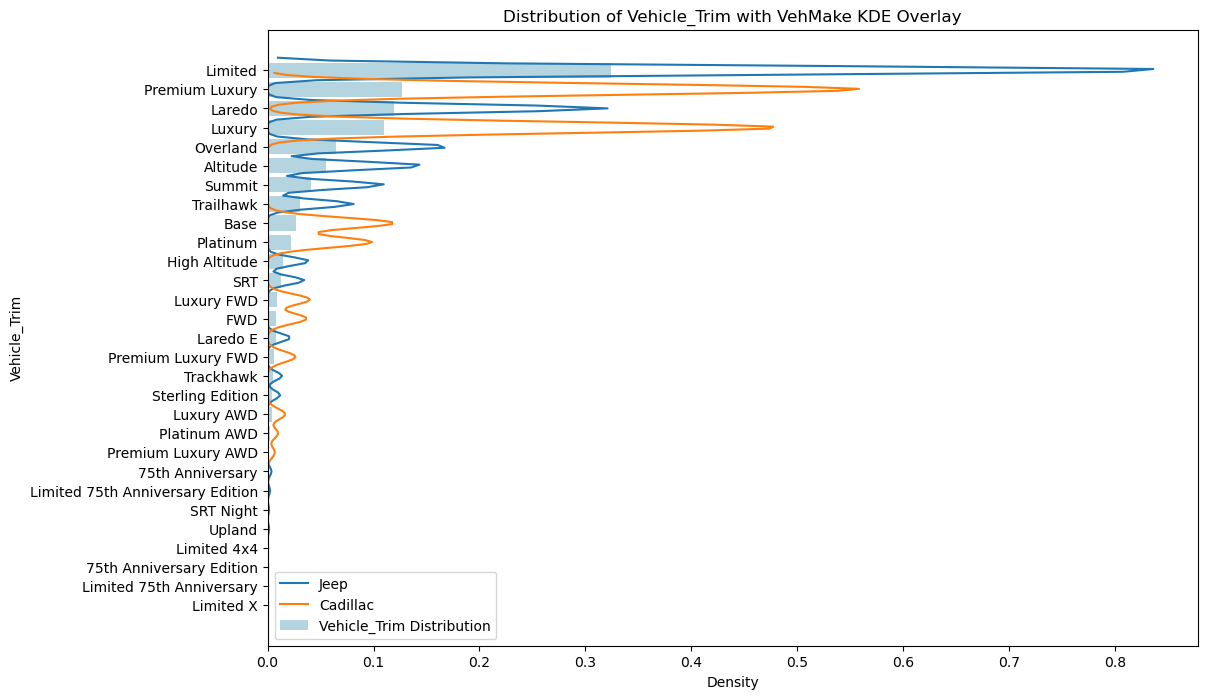

In [27]:
plt.figure(figsize=(12, 8))

vehicle_trim_counts = df_initial['Vehicle_Trim'].value_counts(normalize=True)
order = vehicle_trim_counts.index

sns.barplot(y=order, x=vehicle_trim_counts.values, color='lightblue', label="Vehicle_Trim Distribution")

for make in df_initial['VehMake'].unique():
    subset = df_initial[df_initial['VehMake'] == make]
    sns.kdeplot(y=subset['Vehicle_Trim'].map({trim: i for i, trim in enumerate(order)}), 
                bw_adjust=0.3, 
                label=make)

# Set y-tick labels to the actual Vehicle_Trim values
plt.yticks(ticks=range(len(order)), labels=order)
plt.ylabel('Vehicle_Trim')
plt.xlabel('Density')
plt.title('Distribution of Vehicle_Trim with VehMake KDE Overlay')
plt.legend()
plt.show()

<Axes: xlabel='Dealer_Listing_Price', ylabel='VehMake'>

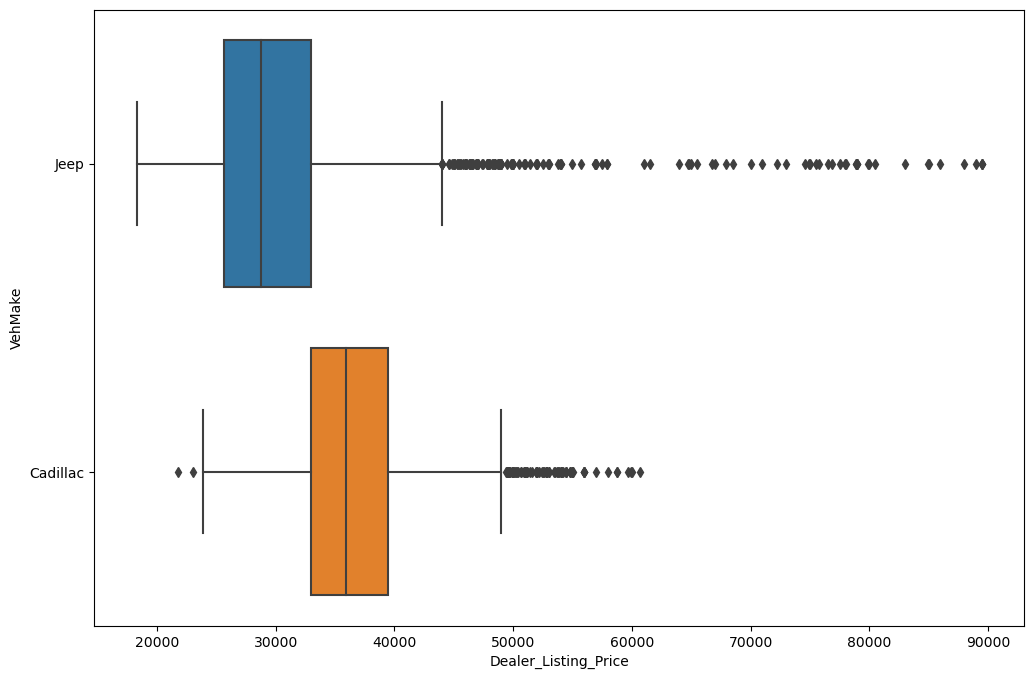

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Dealer_Listing_Price', y='VehMake', data=df_initial, orient='h')

<Axes: xlabel='Dealer_Listing_Price', ylabel='Vehicle_Trim'>

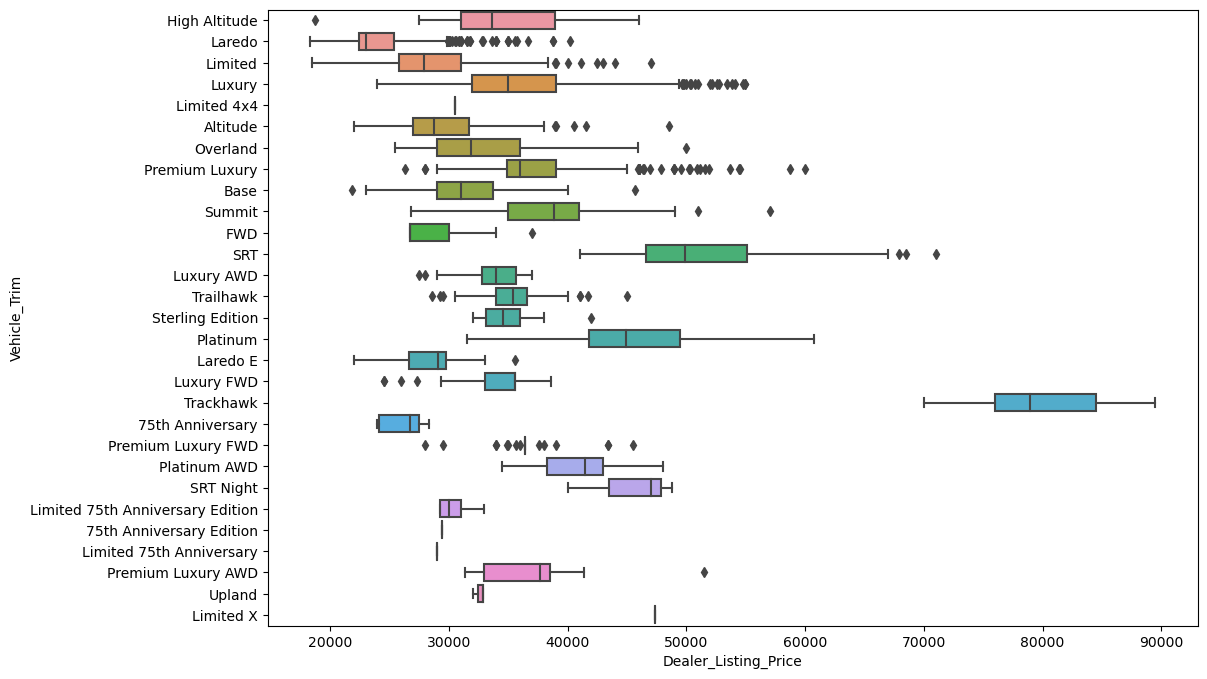

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Dealer_Listing_Price', y='Vehicle_Trim', data=df_initial, orient='h')

<Axes: xlabel='VehYear', ylabel='Dealer_Listing_Price'>

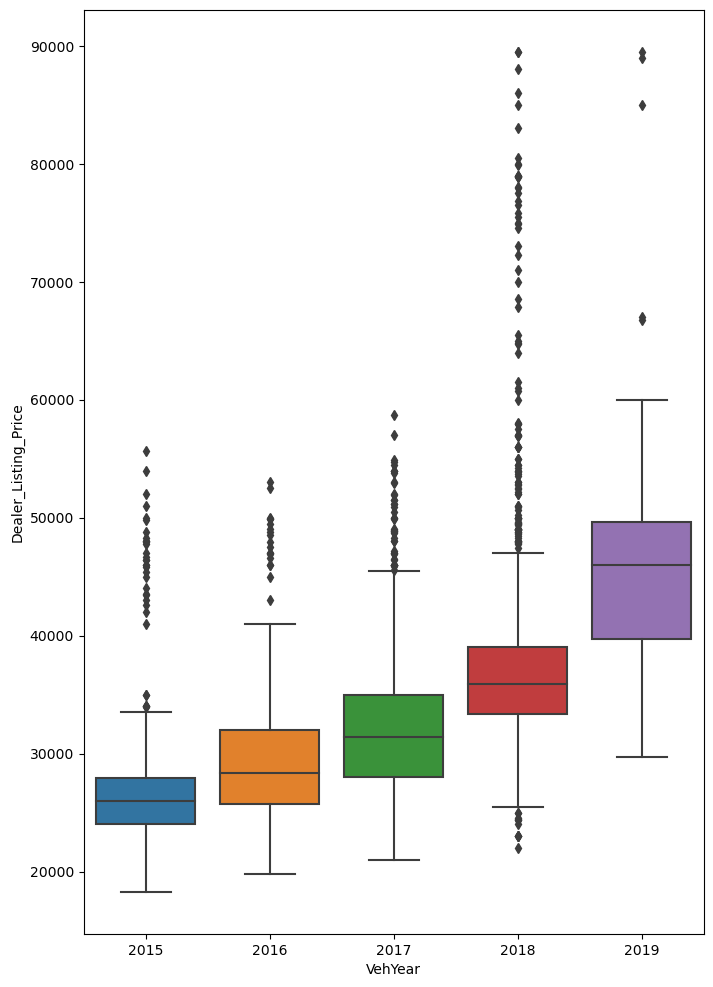

In [30]:
plt.figure(figsize=(8,12))
sns.boxplot(x='VehYear',y='Dealer_Listing_Price',data=df_initial,orient='v')

In [31]:
price_distribution = df_initial['Dealer_Listing_Price']

In [32]:
len(price_distribution[price_distribution > 50000])

128

So we have 128 listings that are over the 90th percentile. For the used cars this is might be the typical case, we for now we can leave it as it is.

Checking the most expensive cars

In [33]:
df_numerical_data.nlargest(10,'Dealer_Listing_Price')

,SellerRating,SellerRevCnt,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
6043,4.2,24,11.730868,260.0,2019,89500.0
1785,4.9,228,14.486979,9.0,2018,89480.0
2480,3.8,98,35.083461,9327.0,2018,89452.0
889,4.7,505,7.573773,601.0,2019,88950.0
4532,4.2,24,11.730833,11.0,2018,88000.0
5424,1.7,111,5.734653,9447.0,2018,85991.0
682,4.3,56,13.362164,1992.0,2019,84995.0
6121,3.0,3,40.855914,205.0,2018,84980.0
3631,4.2,628,42.986609,11329.0,2018,82995.0
3286,4.9,1448,128.993518,7789.0,2018,80494.0


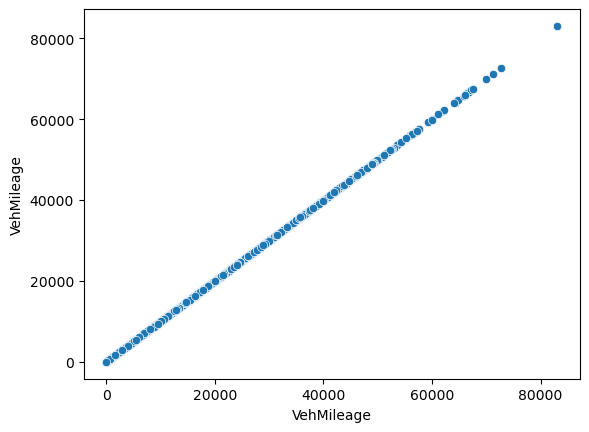

In [34]:
sns.scatterplot(data=df_numerical_data,x='VehMileage',y='VehMileage');

<Axes: xlabel='VehMileage', ylabel='Count'>

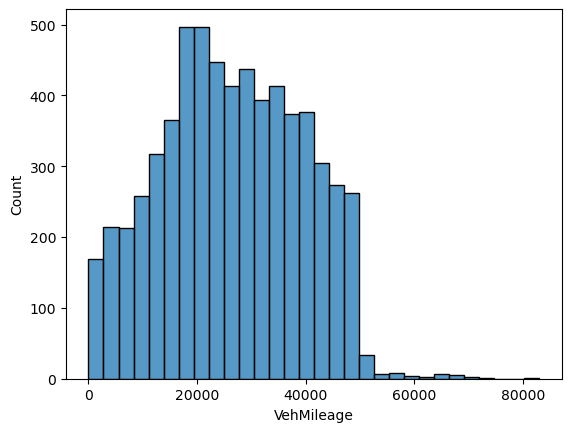

In [35]:
mileage_distribution = df_initial['VehMileage']
mileage_distribution = mileage_distribution.dropna()
sns.histplot(mileage_distribution,bins=30,kde=False)

<Axes: >

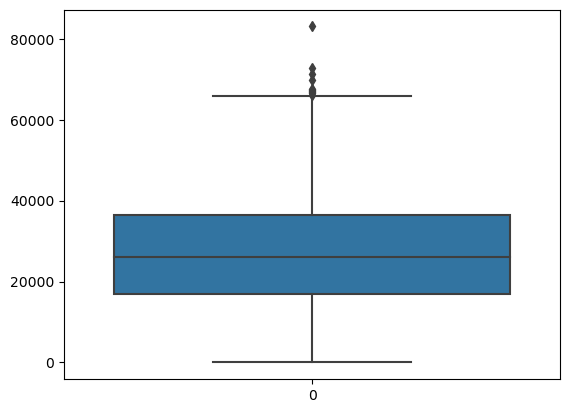

In [36]:
sns.boxplot(mileage_distribution)

In [37]:
len(mileage_distribution[mileage_distribution > 65000])

11

We have 11 listings with outlining high mileage, but again, our model should be capable of handling such cases as it's normal observation for the used cars marker

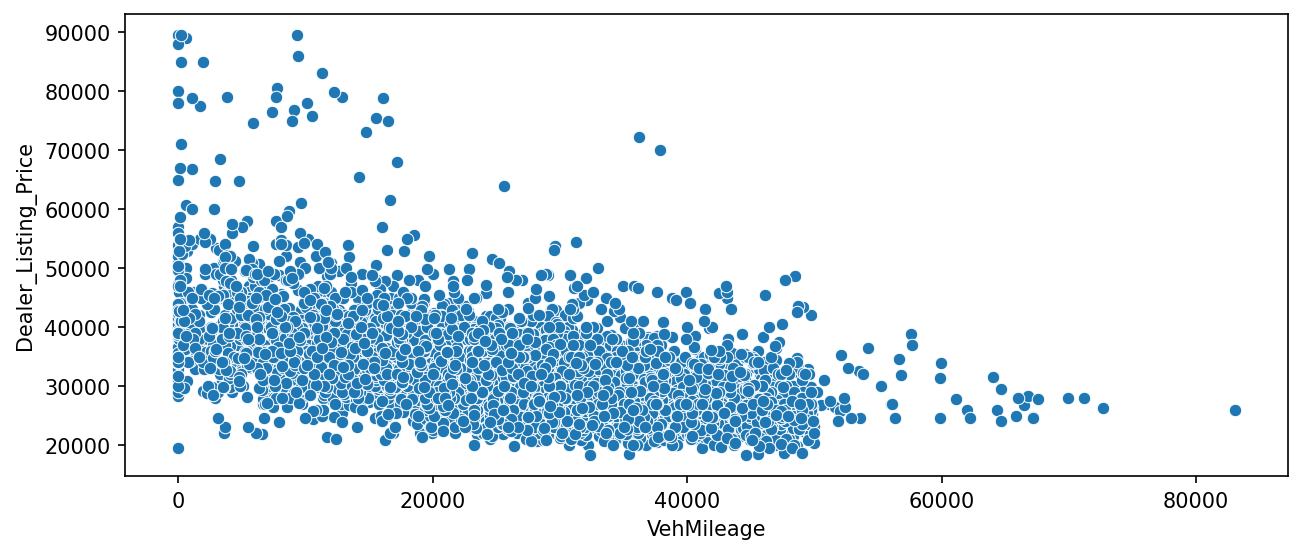

In [38]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df_numerical_data,x='VehMileage',y='Dealer_Listing_Price');

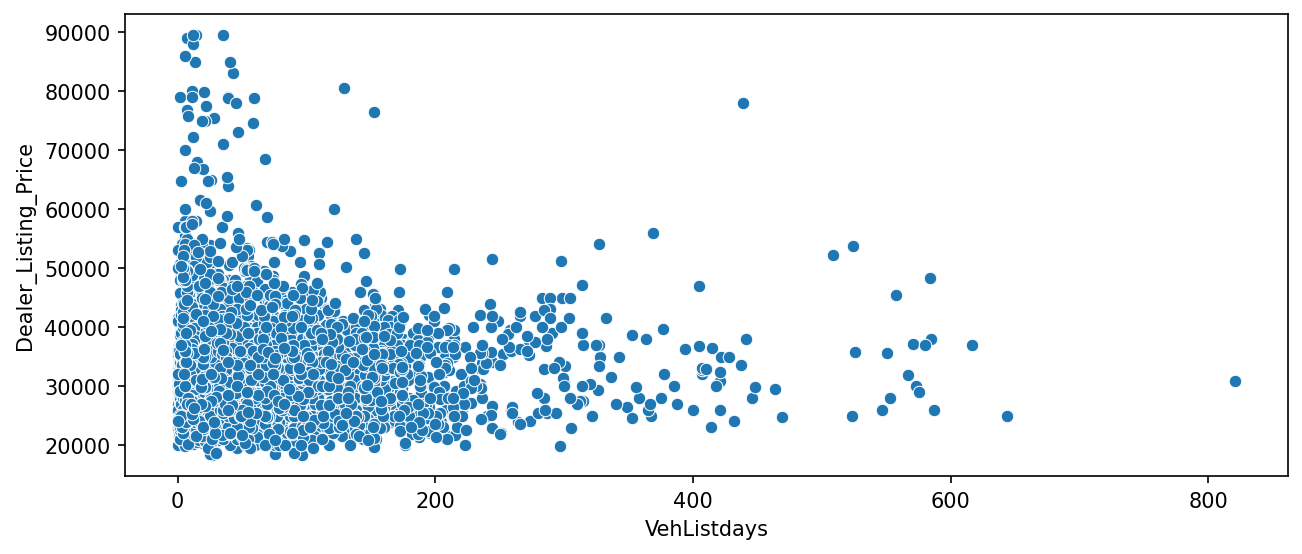

In [39]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df_numerical_data,x='VehListdays',y='Dealer_Listing_Price');

<Axes: xlabel='VehYear', ylabel='count'>

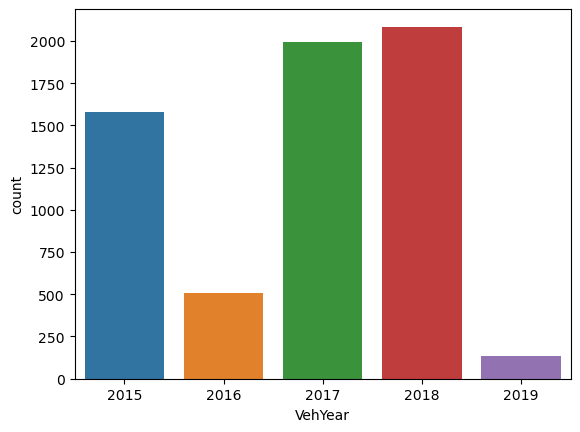

In [40]:
sns.countplot(data=df_initial,x='VehYear')

# Test cell

In [41]:
df_initial.loc[231]

ListingID                                                          311804
SellerCity                                                         Sarver
SellerIsPriv                                                        False
SellerListSrc                                    Digital Motorworks (DMi)
SellerName                                               Jack&#x27;s Ford
SellerRating                                                          5.0
SellerRevCnt                                                           20
SellerState                                                            PA
SellerZip                                                         16055.0
VehBodystyle                                                          SUV
VehCertified                                                        False
VehColorExt                                                  Bright White
VehColorInt                                                         Black
VehDriveTrain                         

# Data healthcheck

In [42]:
df_initial.head(5)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
3,6242,Wentzville,False,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,63385.0,SUV,...,Jeep,20404.0,Grand Cherokee,Good Deal,Drop by to see us and you will quickly see how...,Used,Automatic,2018,Limited,31977.0
4,7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,SUV,...,Cadillac,19788.0,XT5,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",Used,8-Speed Automatic,2018,Luxury,33495.0


Checking the % missing data

In [43]:
100 * df_initial.isnull().sum() / len(df_initial)

ListingID                0.000000
SellerCity               0.000000
SellerIsPriv             0.000000
SellerListSrc            0.031756
SellerName               0.000000
SellerRating             0.000000
SellerRevCnt             0.000000
SellerState              0.000000
SellerZip                0.031756
VehBodystyle             0.000000
VehCertified             0.000000
VehColorExt              1.159098
VehColorInt             11.559225
VehDriveTrain            6.367101
VehEngine                5.731978
VehFeats                 4.366466
VehFuel                  0.031756
VehHistory               3.191489
VehListdays              0.031756
VehMake                  0.000000
VehMileage               0.031756
VehModel                 0.000000
VehPriceLabel            4.525246
VehSellerNotes           3.858368
VehType                  0.000000
VehTransmission          3.127977
VehYear                  0.000000
Vehicle_Trim             6.430613
Dealer_Listing_Price     0.825659
dtype: float64

In [44]:
percent_nan = percent_missing(df_initial)
percent_nan

SellerListSrc            0.031756
SellerZip                0.031756
VehFuel                  0.031756
VehListdays              0.031756
VehMileage               0.031756
Dealer_Listing_Price     0.825659
VehColorExt              1.159098
VehTransmission          3.127977
VehHistory               3.191489
VehSellerNotes           3.858368
VehFeats                 4.366466
VehPriceLabel            4.525246
VehEngine                5.731978
VehDriveTrain            6.367101
Vehicle_Trim             6.430613
VehColorInt             11.559225
dtype: float64

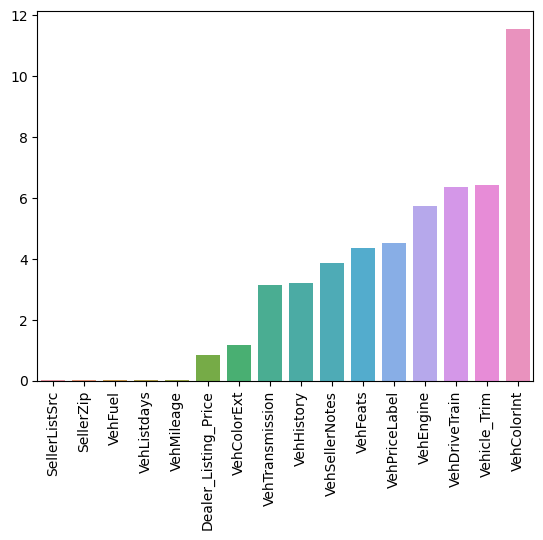

In [45]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

We have a data frame that is about 6298 rows. We could draw the line, potentially saying that we can delete NA data for the columns where the missing data is less than 1 percent.

(0.0, 1.0)

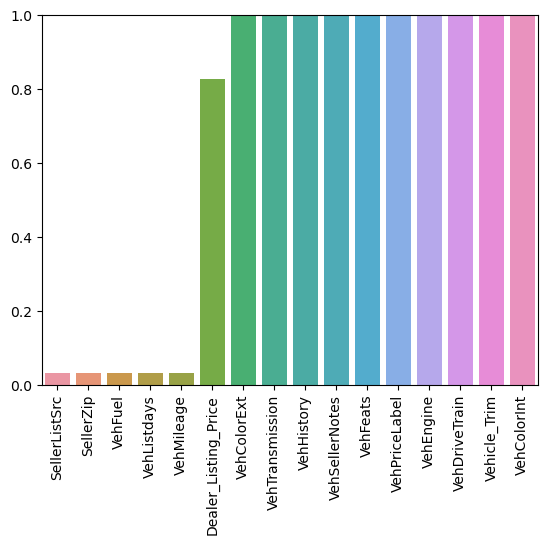

In [46]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# setting up the limit about 1%
plt.ylim(0,1)

In [47]:
percent_nan[percent_nan < 1]

SellerListSrc           0.031756
SellerZip               0.031756
VehFuel                 0.031756
VehListdays             0.031756
VehMileage              0.031756
Dealer_Listing_Price    0.825659
dtype: float64

I have doubts that SellerListSrc and SellerZip have impact on the price, but let's leave them for now. Let's actuall see how many rows are impacted:

In [48]:
percent_nan[percent_nan < 1] / (100/len(df_initial))

SellerListSrc            2.0
SellerZip                2.0
VehFuel                  2.0
VehListdays              2.0
VehMileage               2.0
Dealer_Listing_Price    52.0
dtype: float64

In [49]:
100/len(df_initial)

0.015878056525881232

**Here is the breaking point. Where we need to apply the trim criteria for the numerical and categorical data. let's get a list of column names with missing data**

#### Car's specific features exploration

In [50]:
try:
    if 'VehMake' in df_initial.columns and 'Vehicle_Trim' in df_initial.columns:
        cars_grouped_data = df_initial.groupby('VehMake')['Vehicle_Trim'].value_counts()
        cars_grouped_data
    else:
        print("One or both of the columns 'VehMake' and 'Vehicle_Trim' not found. Skipping this cell.")
except NameError:
    print("Variable 'df_initial' is not defined. Skipping this cell.")

It seems that we have two clusters of data, so I guess each vehicle type trim and price prediction have to be considered individually.

In [51]:
df_initial['VehMake'].value_counts()

Jeep        4199
Cadillac    2099
Name: VehMake, dtype: int64

Now, we will leverage split datasets individually

# Data transformations (handling missing data, etc)

In [52]:
df = pd.read_csv(data_transform_ds)

In [53]:
df_categorical = pd.DataFrame()
df_numerical = pd.DataFrame()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ListingID             6298 non-null   int64  
 1   SellerCity            6298 non-null   object 
 2   SellerIsPriv          6298 non-null   bool   
 3   SellerListSrc         6296 non-null   object 
 4   SellerName            6298 non-null   object 
 5   SellerRating          6298 non-null   float64
 6   SellerRevCnt          6298 non-null   int64  
 7   SellerState           6298 non-null   object 
 8   SellerZip             6296 non-null   float64
 9   VehBodystyle          6298 non-null   object 
 10  VehCertified          6298 non-null   bool   
 11  VehColorExt           6225 non-null   object 
 12  VehColorInt           5570 non-null   object 
 13  VehDriveTrain         5897 non-null   object 
 14  VehEngine             5937 non-null   object 
 15  VehFeats             

In [55]:
percent_nan = percent_missing(df)
percent_nan

SellerListSrc            0.031756
SellerZip                0.031756
VehFuel                  0.031756
VehListdays              0.031756
VehMileage               0.031756
Dealer_Listing_Price     0.825659
VehColorExt              1.159098
VehTransmission          3.127977
VehHistory               3.191489
VehSellerNotes           3.858368
VehFeats                 4.366466
VehPriceLabel            4.525246
VehEngine                5.731978
VehDriveTrain            6.367101
Vehicle_Trim             6.430613
VehColorInt             11.559225
dtype: float64

In [56]:
cadillac_data = df[df['VehMake'] == 'Cadillac']
jeep_data = df[df['VehMake'] == 'Jeep']

At this point, we will discover and apply transformation for each feature individually for the two distinct categories: Jeep and Cadillac where it makes sense and apply generalization where variables are not connected to the veihcle type

## Categorical features

### ListingID

In [57]:
listing_id_final = df['ListingID'].to_frame()
df_categorical['ListingID'] = listing_id_final[listing_id_final.columns[0]]

In [58]:
display_test(df_categorical, test_loc)

ListingID    311804
Name: 231, dtype: int64


### **VehEngine** (categorical)

#### **Cadillac**

In [59]:
len(cadillac_data['VehEngine'])

2099

In [60]:
cad_engine_counts = cadillac_data['VehEngine'].value_counts()
cad_engine_counts

3.6L V6 24V GDI DOHC                                                1085
Gas V6 3.6L/222.6                                                    375
3.6L V6 DI VVT                                                       143
6 Cylinder                                                            69
Engine, 3.6L V6, DI, VVT, with Automatic Stop/Start (310 hp [231      62
3.6L                                                                  36
V6 Cylinder Engine 3.6L                                               31
3.6L V6                                                               26
3.6L V6 CYLINDER                                                      18
Gas V6 3.6L/222                                                       11
3.6L V6 DI VVT Engine                                                 11
V6 Cylinder Engine                                                    10
3.6L 6 cyl                                                             9
3.6L V6 DOHC 24V                                   

In [61]:
cadillac_data.loc[:, 'VehEngine'] = cadillac_data['VehEngine'].replace(cad_engine_replacement_rules)

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/3414774301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadillac_data.loc[:, 'VehEngine'] = cadillac_data['VehEngine'].replace(cad_engine_replacement_rules)


In [62]:
cad_eng_type_counts = cadillac_data['VehEngine'].value_counts()
cad_eng_type_counts

3.6L V6 24V GDI DOHC    1085
3.6L V6                  717
V6                        91
3.6L                      36
Name: VehEngine, dtype: int64

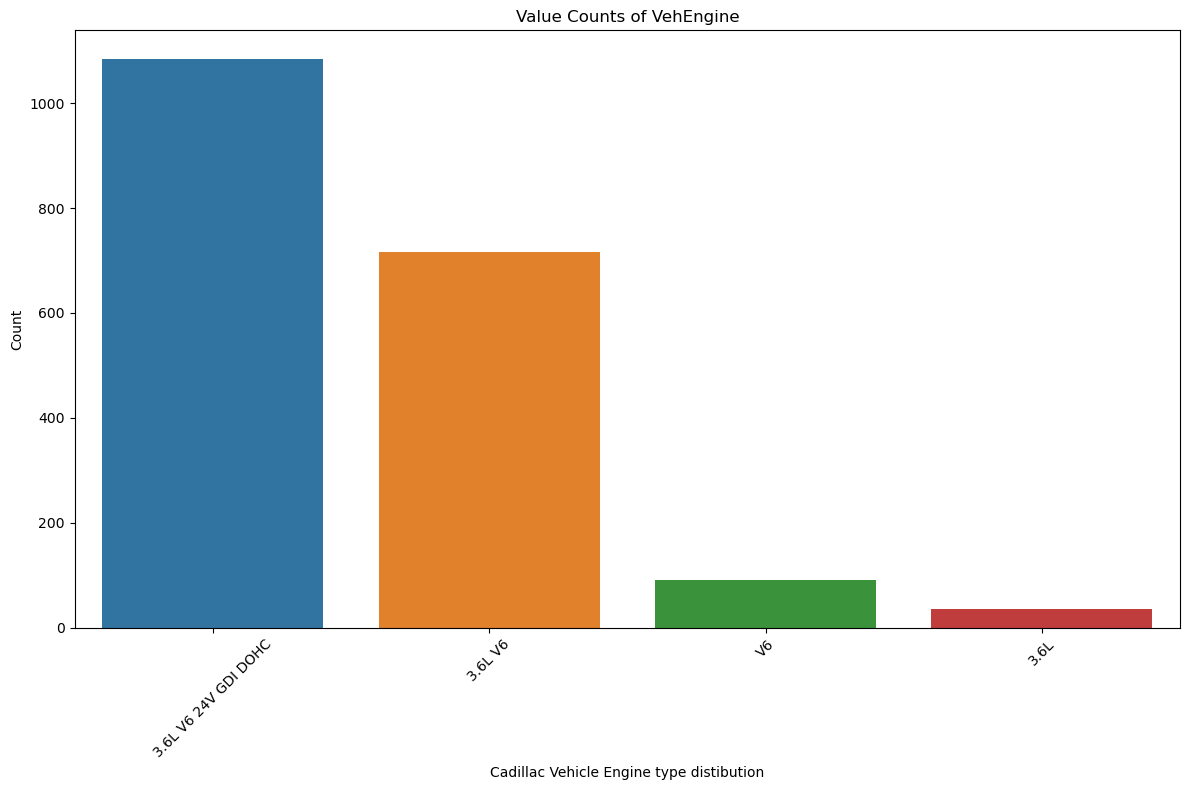

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x=cad_eng_type_counts.index, y=cad_eng_type_counts.values)
plt.xlabel('Cadillac Vehicle Engine type distibution')
plt.ylabel('Count')
plt.title('Value Counts of VehEngine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
cadillac_data['VehEngine'].fillna('unknown', inplace=True)

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/1477613055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadillac_data['VehEngine'].fillna('unknown', inplace=True)


In [65]:
cad_engine_remaining_na = cadillac_data['VehEngine'].isnull().sum()
cad_engine_remaining_na

0

In [66]:
len(cadillac_data['VehEngine'])

2099

#### **Jeep**

In [67]:
len(jeep_data['VehEngine'])

4199

In [68]:
jeep_engine_counts = jeep_data['VehEngine'].value_counts()
for engine, count in jeep_engine_counts.items():
    print(f"{engine}: {count}")

3.6L V6 24V MPFI DOHC: 1851
Regular Unleaded V-6 3.6 L/220: 640
3.6L V6 24V MPFI DOHC Flexible Fuel: 328
3.6L V6 24V VVT: 284
3.6L V6: 180
5.7L V8 16V MPFI OHV: 139
V6 Cylinder Engine 3.6L: 77
6 Cylinder: 70
3.6 L: 48
6.4L V8 16V MPFI OHV: 46
Regular Unleaded V-8 5.7 L/345: 34
3.6L V6 DOHC 24V: 28
3.0L V6 24V DDI DOHC Turbo Diesel: 22
3.6L V6 Cylinder Engine: 22
6.2L V8 16V MPFI OHV Supercharged: 15
3.6L: 14
Premium Unleaded V-8 6.4 L/392: 14
3.6L V6 CYLINDER: 13
5.7L V8 HEMI: 12
5.7L V8: 12
V-6 cyl: 11
6-cylinder: 10
5.7L V8 Multi Displacement VVT: 9
Supercharger Premium Unleaded V-8 6.2 L/376: 8
Intercooled Turbo Diesel V-6 3.0 L/182: 7
V6 Cylinder Engine: 7
3.6: 6
3.6L V6 290hp 260ft. lbs.: 6
3.6L V6 295hp 260ft. lbs.: 6
SRT HEMI 6.4L V8 MDS: 5
8 Cylinder: 5
3.0L V6 Turbodiesel: 5
3.6L V6 GAS: 5
5.7L 8 Cyl.: 4
5.7 L: 4
6: 3
HEMI 6.4L V8 475hp 470ft. lbs.: 3
V6,3.6L(220 CID),DOHC: 3
V6 Flex Fuel 3.6 Liter: 2
V6, 3.6L: 2
HEMI: 2
V8, HEMI, Supercharged, 6.2 Liter: 2
8 Cylinder Engine: 

In [69]:
jeep_data.loc[:, 'VehEngine'] = jeep_data['VehEngine'].replace(jeep_engine_replacement_rules)

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/965391040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeep_data.loc[:, 'VehEngine'] = jeep_data['VehEngine'].replace(jeep_engine_replacement_rules)


In [70]:
len(jeep_data['VehEngine'])

4199

In [71]:
jeep_eng_type_counts = jeep_data['VehEngine'].value_counts()
jeep_eng_type_counts

3.6L V6 24V MPFI DOHC          1851
3.6L V6                        1668
5.7L V8                         220
V6                              105
6.4L V8                          73
3.0L V6                          40
6.2L V8                          25
V8                               17
3.0L V6 DOHC 24V DIESEL           2
6.4L 8 Cylinder Engine            1
V6 Cylinder Engine 3.6L/220       1
6.4L V8 SRT Hemi MDS Engine       1
V6, Flex Fuel, 3.6 Liter          1
Regular Unleaded V-8 5.7 L        1
Regular Unleaded V-6 3.6 L        1
3.6 L V6                          1
Name: VehEngine, dtype: int64

In [72]:
jeep_data['VehEngine'].fillna('unknown', inplace=True)

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/618270212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeep_data['VehEngine'].fillna('unknown', inplace=True)


In [73]:
# List of Jeep engine types to keep
jeep_engines_to_keep = ["3.6L V6 24V MPFI DOHC", "3.6L V6", "5.7L V8", "V6",
                        "6.4L V8", "3.0L V6", "6.2L V8", "V8", "unknown"]

# outliers:
mask = ~jeep_data['VehEngine'].isin(jeep_engines_to_keep)
jeep_data.loc[mask, 'VehEngine'] = 'unknown'

jeep_data['VehEngine'].unique()

array(['3.6L V6', '3.6L V6 24V MPFI DOHC', '3.0L V6', 'unknown',
       '5.7L V8', 'V8', 'V6', '6.4L V8', '6.2L V8'], dtype=object)

In [74]:
len(jeep_data['VehEngine'])

4199

#### **Assembling final engine series data**

In [75]:
df_engine_final = pd.concat([jeep_data['VehEngine'], cadillac_data['VehEngine']], ignore_index=False)
df_engine_final

0                     3.6L V6
2                     3.6L V6
3                     3.6L V6
5       3.6L V6 24V MPFI DOHC
6       3.6L V6 24V MPFI DOHC
                ...          
6285     3.6L V6 24V GDI DOHC
6287                  3.6L V6
6288                  unknown
6295     3.6L V6 24V GDI DOHC
6296     3.6L V6 24V GDI DOHC
Name: VehEngine, Length: 6298, dtype: object

In [76]:
df_engine = df_engine_final.to_frame()
df_categorical = df_categorical.merge(df_engine_final, left_index=True, right_index=True, how='inner')

In [77]:
engine_final_remaining_na = df_engine_final.isnull().sum()
engine_final_remaining_na

0

### **SellerListSrc** (categorical)

In [78]:
sellerlistsrc_counts = df['SellerListSrc'].value_counts()
sellerlistsrc_counts

Digital Motorworks (DMi)       3086
Inventory Command Center       1189
HomeNet Automotive             1037
Jeep Certified Program          709
Cadillac Certified Program      229
My Dealer Center                 29
Sell It Yourself                 14
Five Star Certified Program       3
Name: SellerListSrc, dtype: int64

In [79]:
sellerlistsrc_na_values = df['SellerIsPriv'].isnull().sum()
sellerlistsrc_na_values

0

#### **Appending to the final categorical data series**

In [80]:
sellerlistsrc_final = df['SellerListSrc'].to_frame()
df_categorical = df_categorical.merge(sellerlistsrc_final, left_index=True, right_index=True, how='inner')

### **SellerState** & **SellerZip** (categorical)

In [81]:
seller_state_na_values = df['SellerState'].isnull().sum()
seller_state_na_values

0

In [82]:
seller_zip_na_values = df['SellerZip'].isnull().sum()
seller_zip_na_values

2

Not sure how prices can be different from cities within one state. I'm planning to stick to state data and skipp zip codes

#### **Appending to the final categorical data series**

In [83]:
seller_state_final = df['SellerState'].to_frame()
df_categorical = df_categorical.merge(seller_state_final, left_index=True, right_index=True, how='inner')

### **VehFuel** (categorical)

In [84]:
veh_fuel_na = df['VehFuel'].isnull().sum()
veh_fuel_na

2

In [85]:
veh_fuel_grouped_data = df.groupby('VehMake')['VehFuel'].value_counts()
veh_fuel_grouped_data

VehMake   VehFuel      
Cadillac  Gasoline         2099
Jeep      Gasoline         3803
          E85 Flex Fuel     343
          Diesel             41
          Unknown            10
Name: VehFuel, dtype: int64

#### **Appending to the final categorical data series**

In [86]:
veh_fuel_final = df['VehFuel'].to_frame()
df_categorical = df_categorical.merge(veh_fuel_final, left_index=True, right_index=True, how='inner')

### **VehColorExt** (categorical)

In [87]:
veh_color_ext_na_values = df['VehColorExt'].isnull().sum()
veh_color_ext_na_values

73

In [88]:
veh_color_ext_grouped_data = df.groupby('VehMake')['VehColorExt'].value_counts()
veh_color_ext_grouped_data

VehMake   VehColorExt                
Cadillac  Stellar Black Metallic         322
          Radiant Silver Metallic        268
          Dark Granite Metallic          218
          Crystal White Tricoat          152
          Black                          136
                                        ... 
Jeep      Sangria Metallic Clear Coat      1
          Steel Gray                       1
          Summit White                     1
          True Blue Pearl                  1
          White                            1
Name: VehColorExt, Length: 184, dtype: int64

In [89]:
# Group the 'VehColorExt' values by 'VehMake' and count the occurrences
veh_color_ext_by_make = df.groupby('VehMake')['VehColorExt'].value_counts().unstack().fillna(0).astype(int)
veh_color_ext_by_make

VehColorExt,Beige,Beigh,Billet,Billet Silver,Billet Silver Clearcoat Metallic,Billet Silver M,Billet Silver Metallic,Billet Silver Metallic Clear Coat,Billet Silver Metallic Clearcoat,Billet Silver Metallic Clearcoat - Silver,...,Unspecified,Velvet,Velvet Red,Velvet Red Pearl Coat,Velvet Red Pearlcoat,Walnut Brown,Walnut Brown Metallic Clearcoat,White,White,White Frost
VehMake,,,,,,,,,,,,,,,,,,,,,
Cadillac,2,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,88,0,2
Jeep,0,0,1,2,8,1,6,8,386,1,...,0,37,9,7,189,13,13,248,1,0


Given the vast variety of unique color values and the minor differences among them (like "Billet Silver" vs. "Billet Silver Clearcoat Metallic"), we might consider:

- Major Colors: Retain high-frequency colors as distinct values.
- Group Similar Colors: Colors that are variations or typos of each other can be merged.
- Other Colors: Group the colors with very few occurrences into a generic "Other Colors" category.

In [90]:
df['VehColorExt_Grouped'] = df['VehColorExt'].apply(group_colors)
grouped_colors_by_make = df.groupby('VehMake')['VehColorExt_Grouped'].value_counts().unstack().fillna(0).astype(int)
grouped_colors_by_make

VehColorExt_Grouped,Beige,Black,Blue,Brown,Gold,Gray,Green,Other,Red,Silver,White
VehMake,,,,,,,,,,,
Cadillac,2,533,104,7,4,54,1,349,178,460,407
Jeep,0,998,199,66,3,200,7,778,476,572,900


In [91]:
veh_color_ext_na_values = df['VehColorExt_Grouped'].isnull().sum()
veh_color_ext_na_values

0

#### **Appending to the final categorical data series**

In [92]:
veh_color_ext_final = df['VehColorExt_Grouped'].to_frame()
veh_color_ext_final = veh_color_ext_final.rename(columns={'VehColorExt_Grouped': 'VehColorExt'})
df_categorical = df_categorical.merge(veh_color_ext_final, left_index=True, right_index=True, how='inner')

In [93]:
len(df_categorical)

6298

### **VehColorInt** (categorical)

In [94]:
veh_color_int_na_values = df['VehColorInt'].isnull().sum()
veh_color_int_na_values

728

We have a bunch of missing values. Given the nature of the data, the VehColorInt column represents the internal color of vehicles, which can be a significant factor for some buyers. Therefore, it's essential to handle missing values in this column sensibly. Due to the nature of the data we could use Mode or replace NA with 'Unknown' values. I prefer the 2nd option.

In [95]:
df['VehColorInt'].fillna('unknown', inplace=True)

In [96]:
veh_color_int_by_make_updated = df.groupby('VehMake')['VehColorInt'].value_counts().unstack().fillna(0).astype(int)
veh_color_int_by_make_updated

VehColorInt,BEIGE,BLACK,BLACK LEATHER,BLACK/LIGHT FROST,Beige,Beige Cloth,Beige Leather,Black,Black / Dark Sienna Brown,Black / Light Frost Beige,...,Tan,Tan Leather,black,brown,gray,jet black,light frost brown,lt frost beige black,sahara beige,unknown
VehMake,,,,,,,,,,,,,,,,,,,,,
Cadillac,0,3,0,0,9,0,0,125,0,0,...,46,0,0,0,0,30,0,0,13,317
Jeep,1,13,2,1,5,2,5,2893,18,1,...,21,1,102,1,1,0,1,10,0,411


In [97]:
df['VehColorInt'] = df['VehColorInt'].apply(normalize_color)

In [98]:
veh_color_int_grouped_data = df.groupby('VehMake')['VehColorInt'].value_counts()
veh_color_int_grouped_data

VehMake   VehColorInt                 
Cadillac  black                           956
          unknown                         317
          shara beige                     263
          beige                           231
          cirrus                          142
                                         ... 
Jeep      pewter                            1
          red/black                         1
          ruby red / black                  1
          ruby red/black leather            1
          ruby red/black leather/suede      1
Name: VehColorInt, Length: 90, dtype: int64

Still to many categories

In [99]:
df['VehColorInt'] = df['VehColorInt'].apply(further_normalize_color)
veh_color_int_further_normalized_by_make = df.groupby('VehMake')['VehColorInt'].value_counts().unstack().fillna(0).astype(int)
veh_color_int_further_normalized_by_make

VehColorInt,beige,black,blue,brown,gray,other,red,tan,unknown
VehMake,,,,,,,,,
Cadillac,231,956,0,1,2,545,0,47,317
Jeep,13,3107,2,58,19,565,2,22,411


#### **Appending to the final categorical data series**

In [100]:
veh_color_in_final = df['VehColorInt'].to_frame()
#df_categorical['VehColorInt'] = veh_color_in_final[veh_color_in_final.columns[0]]
df_categorical = df_categorical.merge(veh_color_in_final, left_index=True, right_index=True, how='inner')

### **VehTransmission** (categorical)

#### **Cadillac**

In [101]:
cad_transmission_na_values = cadillac_data['VehTransmission'].isnull().sum()
cad_transmission_na_values

171

In [102]:
len(cadillac_data['VehTransmission'])

2099

In [103]:
cad_transmission_type_counts = cadillac_data['VehTransmission'].value_counts()
cad_transmission_type_counts

8-Speed Automatic              1632
Automatic                       109
8-SPEED A/T                      64
AUTOMATIC                        35
8-Speed Shiftable Automatic      33
8-Speed A/T                      16
Automatic 8-Speed                12
8-Speed                           7
Not Specified                     4
Automatic, 8-Spd                  3
8-SPEED AUTOMATIC                 3
6-Speed Automatic                 2
Select                            2
Automanual                        1
a                                 1
MRC                               1
8 Speed Automatic                 1
automatic                         1
Shiftable Automatic               1
Name: VehTransmission, dtype: int64

In [104]:
cadillac_data['VehTransmission'].fillna('unknown', inplace=True)

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/862318653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadillac_data['VehTransmission'].fillna('unknown', inplace=True)


In [105]:
cadillac_data.loc[:, 'VehTransmission'] = cadillac_data['VehTransmission'].replace(replacement_rules_transmission)

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/3199284191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadillac_data.loc[:, 'VehTransmission'] = cadillac_data['VehTransmission'].replace(replacement_rules_transmission)


In [106]:
cad_transmission_type_counts = cadillac_data['VehTransmission'].value_counts()
cad_transmission_type_counts

8-Speed Automatic    1759
unknown               171
Automatic             147
Automatic 8-Speed      12
Other                   8
6-Speed Automatic       2
Name: VehTransmission, dtype: int64

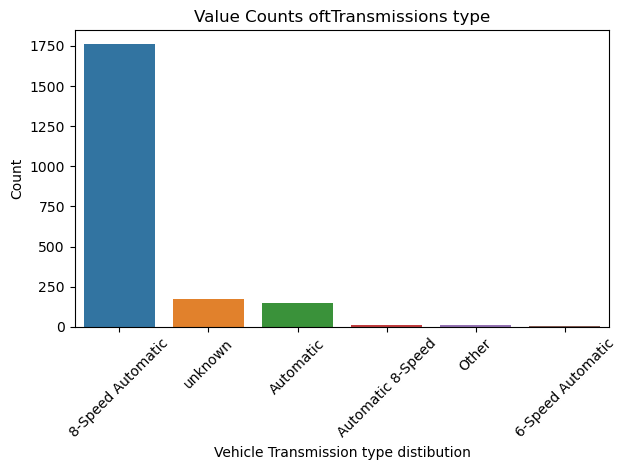

In [107]:
cad_transmission_counts = cadillac_data['VehTransmission'].value_counts()

sns.barplot(x=cad_transmission_counts.index, y=cad_transmission_counts.values)
plt.xlabel('Vehicle Transmission type distibution')
plt.ylabel('Count')
plt.title('Value Counts oftTransmissions type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It looks like only one type of the VehTransmission is predominantly dominated over other types so we can secure substitute the NA values. To substitute the missing (NA) values in the VehTransmission column with its mode (most frequently occurring value), we can use the fillna method in conjunction with the mode method.

In [108]:
mode_value = cadillac_data['VehTransmission'].mode()[0]
cadillac_data['VehTransmission'].fillna(mode_value, inplace=True)

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/3214454926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadillac_data['VehTransmission'].fillna(mode_value, inplace=True)


In [109]:
len(cadillac_data['VehTransmission'])

2099

#### **Jeep**

In [110]:
jeep_transmission_type_counts = jeep_data['VehTransmission'].value_counts()
jeep_transmission_type_counts

8-Speed Automatic                2763
8-Speed Automatic w/OD            676
Automatic                         414
AUTOMATIC                          68
Automatic 8-Speed                  60
8-Speed Shiftable Automatic        53
8-Speed Automatic (845RE)          50
8-Speed A/T                        37
8-Speed Automatic (850RE)          11
8-Spd TorqueFlite Automatic         7
8 Speed Automatic                   6
8-Speed Automatic (8HP70)           5
8-Speed                             4
Automatic, 8-Spd                    4
A                                   2
8 speed automatic                   2
Automanual                          1
Auto                                1
8-Spd Auto 850RE Trans (Make        1
8-SPEED AUTOMATIC                   1
AUTO                                1
8-Speed TorqueFlite Automatic       1
Automatic w/OD                      1
Shiftable Automatic                 1
aujtomatic                          1
Not Specified                       1
8-Spd Auto 8

In [111]:
len(jeep_data['VehTransmission'])

4199

In [112]:
jeep_data['VehTransmission'] =  jeep_data['VehTransmission'].apply(jeep_transmission_replacement)
jeep_transmission_distribution = jeep_data['VehTransmission'].value_counts()
jeep_transmission_distribution

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/4015560893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeep_data['VehTransmission'] =  jeep_data['VehTransmission'].apply(jeep_transmission_replacement)


8-Speed Automatic    3674
Automatic             495
unknown                26
Other                   4
Name: VehTransmission, dtype: int64

In [113]:
len(jeep_data['VehTransmission'])

4199

#### **Appending to the final categorical data series**

In [114]:
df_transmission_final = pd.concat([jeep_data['VehTransmission'], cadillac_data['VehTransmission']])
df_transmission_final

0       8-Speed Automatic
2       8-Speed Automatic
3               Automatic
5       8-Speed Automatic
6       8-Speed Automatic
              ...        
6285    8-Speed Automatic
6287              unknown
6288              unknown
6295    8-Speed Automatic
6296    8-Speed Automatic
Name: VehTransmission, Length: 6298, dtype: object

In [115]:
veh_transmission = df_transmission_final.to_frame()
df_categorical = df_categorical.merge(veh_transmission, left_index=True, right_index=True, how='inner')
df_categorical.fillna('unknown', inplace=True)

### **VehFeats**

In [116]:
veh_feats_na_count = df['VehFeats'].isnull().sum()
veh_feats_na_count

275

In [117]:
# Check the distribution of 'VehFeats' values
veh_feats_value_counts = df['VehFeats'].value_counts()
veh_feats_value_counts[:10]

['1st and 2nd row curtain head airbags', '4-wheel ABS Brakes', 'ABS and Driveline Traction Control', 'Anti-theft alarm system', 'Audio controls on steering wheel', 'Audio system memory card slot', 'Auxilliary engine cooler', 'Braking Assist']                                     868
['1st and 2nd row curtain head airbags', '4-wheel ABS Brakes', 'ABS and Driveline Traction Control', 'AM/FM/Satellite-prep Radio', 'Audio controls on steering wheel', 'Audio system memory card slot', 'Automatic front air conditioning', 'Auxilliary engine cooler']                580
['1st and 2nd row curtain head airbags', '4-wheel ABS Brakes', 'ABS and Driveline Traction Control', 'Aluminum door trim', 'Audio controls on steering wheel', 'Audio System Premium Brand Speakers: Bose Studio Surround', 'Audio system security', 'Beverage cooler in glovebox']    309
['1st and 2nd row curtain head airbags', '4-wheel ABS Brakes', 'ABS and Driveline Traction Control', 'Anti-theft alarm system', 'Audio controls on stee

The most common list of features (shown in the output above) appears 868 times and includes features like "1st and 2nd-row curtain head airbags", "4-wheel ABS Brakes", and "Audio controls on the steering wheel", among others. Imputation seems overcomplicated, considering the small number of NA values we can drop them

### **VehPriceLabel** (categorical)

In [118]:
df['VehPriceLabel'][:5]

0    Fair Price
1     Good Deal
2     Good Deal
3     Good Deal
4     Good Deal
Name: VehPriceLabel, dtype: object

In [119]:
veh_price_label_na = df['VehPriceLabel'].isnull().sum()
veh_price_label_na

285

In [120]:
# Check the distribution of 'VehPriceLabel' values
veh_price_label_value_counts = df['VehPriceLabel'].value_counts()

veh_price_label_value_counts.head(5)  # Displaying the top 10 values for brevity

Good Deal     4488
Great Deal     844
Fair Price     681
Name: VehPriceLabel, dtype: int64

The column contains labels indicating the perceived value of the vehicle's price. The most common label is "Good Deal", appearing 4,287 times. This is followed by "Great Deal" and "Fair Price". We can fill the missing values with the most frequent label. This assumes that vehicles with missing price labels are similar to the most common vehicles in the dataset.

In [121]:
df['VehPriceLabel'].fillna('Good Deal', inplace=True)
remaining_na_values_price_label = df['VehPriceLabel'].isnull().sum()
remaining_na_values_price_label

0

#### **Appending to the final categorical data series**

In [122]:
veh_price_label_final = df['VehPriceLabel'].to_frame()
df_categorical = df_categorical.merge(veh_price_label_final, left_index=True, right_index=True, how='inner')

### **VehDriveTrain** (categorical)

#### **Cadillac**

In [123]:
len(jeep_data['VehDriveTrain']+cadillac_data['VehDriveTrain'])

6298

In [124]:
len(cadillac_data['VehDriveTrain'])

2099

In [125]:
cadillac_data['VehDriveTrain'].fillna('unknown', inplace=True)

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/3887882800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadillac_data['VehDriveTrain'].fillna('unknown', inplace=True)


In [126]:
cad_drivetrain_counts = cadillac_data['VehDriveTrain'].value_counts()
cad_drivetrain_counts

FWD                                                           1093
AWD                                                            720
unknown                                                        174
FRONT-WHEEL DRIVE                                               35
ALL-WHEEL DRIVE                                                 27
Front Wheel Drive                                               20
All Wheel Drive                                                 19
All-wheel Drive                                                  5
Front-wheel Drive                                                2
ALL-WHEEL DRIVE WITH LOCKING AND LIMITED-SLIP DIFFERENTIAL       1
2WD                                                              1
ALL WHEEL                                                        1
AllWheelDrive                                                    1
Name: VehDriveTrain, dtype: int64

In [127]:
cadillac_data.loc[:, 'VehDriveTrain'] = cadillac_data['VehDriveTrain'].replace(replacement_rules_drivetrain)

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/2972452367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadillac_data.loc[:, 'VehDriveTrain'] = cadillac_data['VehDriveTrain'].replace(replacement_rules_drivetrain)


In [128]:
len(cadillac_data['VehDriveTrain'])

2099

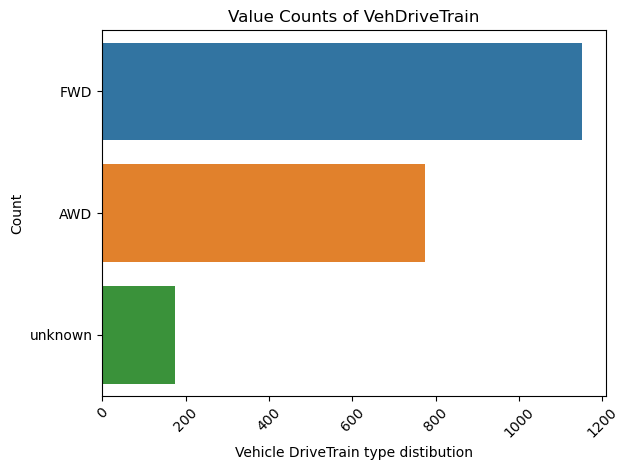

In [129]:
cad_drivetrain_counts = cadillac_data['VehDriveTrain'].value_counts()

sns.barplot(x=cad_drivetrain_counts.values, y=cad_drivetrain_counts.index)
plt.xlabel('Vehicle DriveTrain type distibution')
plt.ylabel('Count')
plt.title('Value Counts of VehDriveTrain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [130]:
cad_drivetrain_counts = cadillac_data['VehDriveTrain'].value_counts()
cad_drivetrain_counts

FWD        1151
AWD         774
unknown     174
Name: VehDriveTrain, dtype: int64

In [131]:
# List of VehDriveTrain types to keep
cad_drivetrain_to_keep = ["FWD", "AWD", "unknown"]

# Filter rows
cadillac_data = cadillac_data[cadillac_data['VehDriveTrain'].isin(cad_drivetrain_to_keep)]

In [132]:
cad_drivetrain_remaining_na = cadillac_data['VehDriveTrain'].isnull().sum()
cad_drivetrain_remaining_na

0

In [133]:
len(cadillac_data['VehDriveTrain'])

2099

#### **Jeep**

In [134]:
len(jeep_data['VehDriveTrain'])

4199

In [135]:
jeep_data['VehDriveTrain'].fillna('unknown', inplace=True)

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/2772326339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeep_data['VehDriveTrain'].fillna('unknown', inplace=True)


In [136]:
jeep_drivetrain_counts = jeep_data['VehDriveTrain'].value_counts()
jeep_drivetrain_counts

4WD                  3836
unknown               227
4X4                    52
Four Wheel Drive       41
4x4                    12
4x4/4-wheel drive      10
4x4/4WD                 9
AWD or 4x4              6
AWD                     5
4WD/AWD                 1
Name: VehDriveTrain, dtype: int64

In [137]:
jeep_data['VehDriveTrain'] = jeep_data['VehDriveTrain'].apply(jeep_bin_drive_type)

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/334432289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeep_data['VehDriveTrain'] = jeep_data['VehDriveTrain'].apply(jeep_bin_drive_type)


In [138]:
jeep_drivetrain_counts = jeep_data['VehDriveTrain'].value_counts()
jeep_drivetrain_counts

4WD        3967
unknown     227
AWD           5
Name: VehDriveTrain, dtype: int64

In [139]:
jeep_drivetrain_remaining_na = jeep_data['VehDriveTrain'].isnull().sum()
jeep_drivetrain_remaining_na

0

In [140]:
len(jeep_data['VehDriveTrain'])

4199

#### **Appending to the final categorical data series**

In [141]:
veh_drivetrain_final = pd.concat([jeep_data['VehDriveTrain'], cadillac_data['VehDriveTrain']])

In [142]:
#df_categorical.drop(columns=['VehDriveTrain_x', 'VehDriveTrain_y'], inplace=True)

In [143]:
veh_drivetrain = veh_drivetrain_final.to_frame()
df_categorical = df_categorical.merge(veh_drivetrain, left_index=True, right_index=True, how='inner')

In [144]:
display_test(df_categorical, test_loc)

ListingID                            311804
VehEngine             3.6L V6 24V MPFI DOHC
SellerListSrc      Digital Motorworks (DMi)
SellerState                              PA
VehFuel                            Gasoline
VehColorExt                           White
VehColorInt                           black
VehTransmission           8-Speed Automatic
VehPriceLabel                     Good Deal
VehDriveTrain                           4WD
Name: 231, dtype: object


In [145]:
len(df_categorical)

6298

### **Vehicle_Trim** (categorical)

#### Cadillac

In [146]:
len(cadillac_data['Vehicle_Trim'])

2099

In [147]:
cadillac_data['Vehicle_Trim'].fillna('unknown', inplace=True)

Due to the dispersion of the distribution, it's hard to define the optimal NA replacement strategy. For the price prediction we introduce the 'Unknown' category, for the Trim prediction, we would need to drop missing values

In [148]:
cad_trim_type_counts = cadillac_data['Vehicle_Trim'].value_counts()
cad_trim_type_counts

Premium Luxury        747
Luxury                645
unknown               236
Base                  159
Platinum              131
Luxury FWD             53
FWD                    49
Premium Luxury FWD     35
Luxury AWD             22
Platinum AWD           13
Premium Luxury AWD      9
Name: Vehicle_Trim, dtype: int64

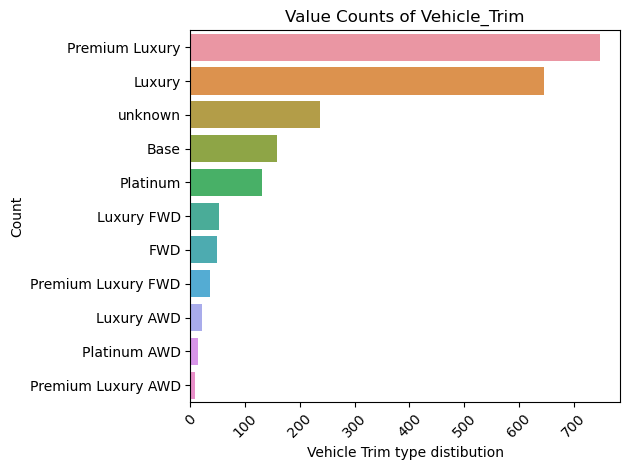

In [149]:
sns.barplot(x=cad_trim_type_counts.values, y=cad_trim_type_counts.index)
plt.xlabel('Vehicle Trim type distibution')
plt.ylabel('Count')
plt.title('Value Counts of Vehicle_Trim')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Considering the number of trim classes, it would make sense to simplify the number of instances we can predict for the classes with very little data representation. We would not be capable of doing this, so let's defile the substitution rules:

In [150]:
cadillac_data['Vehicle_Trim'] = cadillac_data['Vehicle_Trim'].replace(cad_trim_replacement_rules)

In [151]:
cad_trim_type_counts = cadillac_data['Vehicle_Trim'].value_counts()
cad_trim_type_counts

Premium Luxury    791
Luxury            720
unknown           236
Base              159
Platinum          144
FWD                49
Name: Vehicle_Trim, dtype: int64

In [152]:
cad_veh_trim_remaining_na = cadillac_data['Vehicle_Trim'].isnull().sum()
cad_veh_trim_remaining_na

0

In [153]:
len(cadillac_data['Vehicle_Trim'])

2099

#### **Jeep**

Due to the large number of trim options for the Jeep. Here we need to voluntarily apply the following rule: if the trim contains terms like "Premium", "Overland", or "Summit", we'll categorize it under "Premium Luxury".
If the trim contains terms like "Sport" or "Base", we'll label it as "Base".
Trims with "Trailhawk" will remain as "Trailhawk".
All other trims will be labeled as "Limited".
Missing values will be replaced with "Unknown". This is where the domain knowledge can be useful.

In [154]:
jeep_data['Vehicle_Trim'] =  jeep_data['Vehicle_Trim'].apply(jeep_trim_replacement)

/var/folders/3f/ym6k1f9n7wvfkfx6ntlsjrbh0000gn/T/ipykernel_12895/633348793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeep_data['Vehicle_Trim'] =  jeep_data['Vehicle_Trim'].apply(jeep_trim_replacement)


In [155]:
jeep_trim_type_counts = jeep_data['Vehicle_Trim'].value_counts()
jeep_trim_type_counts

Limited           3229
Premium Luxury     623
Trailhawk          178
unknown            169
Name: Vehicle_Trim, dtype: int64

In [156]:
# List of Jeep Vehicle_Trim values to keep
jeep_trim_keep_values = [
                          'Limited',
                          'Premium Luxury', 
                          'Laredo',
                          'Overland',
                          'Altitude',
                          'Summit',
                          'Trailhawk',
                          'High Altitude',
                          'SRT',
                          'Laredo E',
                          'Trackhawk',
                          'unknown'
                          ]

# Identify rows that don't have values in Jeep Vehicle_Trim to keep
mask = ~jeep_data['Vehicle_Trim'].isin(jeep_trim_keep_values)

# Replace those values with 'unknown'
jeep_data.loc[mask, 'Vehicle_Trim'] = 'unknown'

# Display the unique values after the transformations
jeep_data['Vehicle_Trim'].unique()

array(['Limited', 'Premium Luxury', 'unknown', 'Trailhawk'], dtype=object)

In [157]:
jeep_trim_type_counts = jeep_data['Vehicle_Trim'].value_counts()
jeep_trim_type_counts

Limited           3229
Premium Luxury     623
Trailhawk          178
unknown            169
Name: Vehicle_Trim, dtype: int64

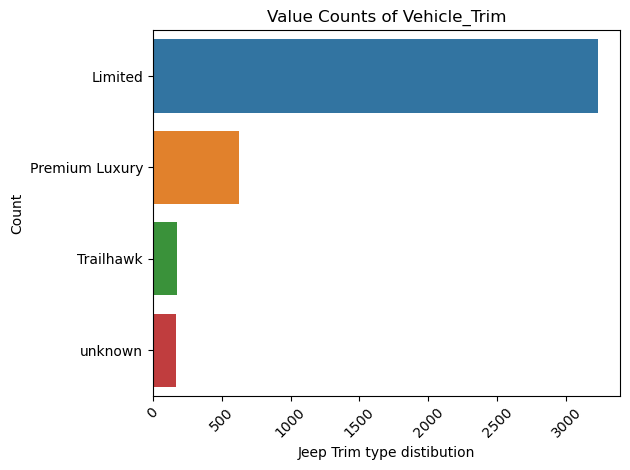

In [158]:
sns.barplot(x=jeep_trim_type_counts.values, y=jeep_trim_type_counts.index)
plt.xlabel('Jeep Trim type distibution')
plt.ylabel('Count')
plt.title('Value Counts of Vehicle_Trim')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [159]:
jeep_veh_trim_remaining_na = jeep_data['Vehicle_Trim'].isnull().sum()
jeep_veh_trim_remaining_na

0

In [160]:
len(jeep_data['Vehicle_Trim'])

4199

#### **Appending to the final categorical data series**

In [161]:
veh_trim = pd.concat([jeep_data['Vehicle_Trim'], cadillac_data['Vehicle_Trim']])

In [162]:
veh_trim_final = veh_trim.to_frame()
df_categorical = df_categorical.merge(veh_trim_final, left_index=True, right_index=True, how='inner')

In [163]:
len(df_categorical)

6298

### **VehMake** (categorical)

In [164]:
veh_make_na = df['VehMake'].isnull().sum()
veh_make_na

0

In [165]:
veh_make_final = df['VehMake'].to_frame()
df_categorical = df_categorical.merge(veh_make_final, left_index=True, right_index=True, how='inner')

In [166]:
len(df_categorical)

6298

### **VehModel** (categorical)

In [167]:
veh_model_na = df['VehModel'].isnull().sum()
veh_model_na

0

In [168]:
veh_model_grouped_data = df.groupby('VehMake')['VehModel'].value_counts()
veh_model_grouped_data

VehMake   VehModel      
Cadillac  XT5               2099
Jeep      Grand Cherokee    4199
Name: VehModel, dtype: int64

#### **Appending to the final categorical data series**

In [169]:
veh_model_final = df['VehModel'].to_frame()
df_categorical = df_categorical.merge(veh_model_final, left_index=True, right_index=True, how='inner')

In [170]:
len(df_categorical)

6298

### **SellerRating** (categorical)

In [171]:
seller_rating_distribution = df['SellerRating'].describe()
seller_rating_distribution

count    6298.000000
mean        4.138346
std         1.188033
min         0.000000
25%         4.000000
50%         4.600000
75%         4.800000
max         5.000000
Name: SellerRating, dtype: float64

In [172]:
df['RatingCategory'] = df['SellerRating'].apply(bucket_ratings)

rating_category_counts = df['RatingCategory'].value_counts()
rating_category_counts

Excellent Rating    3739
Good Rating          986
Average Rating       934
Low Rating           639
Name: RatingCategory, dtype: int64

In [173]:
rating_category_null_values_count = df['RatingCategory'].isnull().sum()
rating_category_null_values_count

0

#### **Appending to the final categorical data series**

In [174]:
seller_rating_final = df['RatingCategory'].to_frame()
df_categorical = df_categorical.merge(seller_rating_final, left_index=True, right_index=True, how='inner')

### **SellerName** (categorical)

In [175]:
seller_name_counts = df['SellerName'].value_counts()
seller_name_counts

Vroom (Online Dealer - Nationwide Delivery)                381
Carvana                                                    236
Henkel Chrysler Dodge Jeep Ram                             100
OffLeaseOnly.com The Nation&#x27;s Used Car Destination     37
Koons Tysons Chrysler Dodge Jeep RAM                        36
                                                          ... 
Liberty Buick GMC                                            1
Ray Skillman KIA Mitsubishi                                  1
West Herr Toyota of Orchard Park                             1
Raymond Chevrolet-Kia                                        1
Foster Chevrolet Cadillac                                    1
Name: SellerName, Length: 2452, dtype: int64

Some names contains html tags, so we have to normilize values first

In [176]:
import html

def normalize_text(text):
    if pd.isnull(text):
        return text
    normalized = text.lower().strip()
    return html.unescape(normalized)

df['SellerName'] = df['SellerName'].apply(normalize_text)

normalized_seller_name_counts = df['SellerName'].value_counts()
normalized_seller_name_counts

vroom (online dealer - nationwide delivery)           382
carvana                                               236
henkel chrysler dodge jeep ram                        100
offleaseonly.com the nation's used car destination     37
koons tysons chrysler dodge jeep ram                   36
                                                     ... 
klinkhammer motors                                      1
liberty buick gmc                                       1
ray skillman kia mitsubishi                             1
west herr toyota of orchard park                        1
foster chevrolet cadillac                               1
Name: SellerName, Length: 2450, dtype: int64

Based on the number of listings we can group them into buckets like:

*   High Volume Sellers: Sellers with a large number of listings.
*   Medium Volume Sellers: Sellers with a moderate number of listings.
*   Low Volume Sellers: Sellers with a few listings.
*   Rare Sellers: Sellers with very few listings (e.g., just 1 or 2).

In [177]:
# Distribution of number of listings per seller
listing_counts_distribution = normalized_seller_name_counts.value_counts().sort_index()

# Cumulative distribution
cumulative_distribution = listing_counts_distribution.cumsum() / df['SellerName'].notna().sum()

listing_counts_distribution, cumulative_distribution

(1      1418
 2       453
 3       191
 4       138
 5        79
 6        44
 7        29
 8        24
 9        14
 10       12
 11        8
 12        4
 13        4
 14        4
 16        1
 17        5
 18        1
 19        2
 20        3
 21        3
 23        2
 28        1
 29        1
 32        2
 33        1
 34        1
 36        1
 37        1
 100       1
 236       1
 382       1
 Name: SellerName, dtype: int64,
 1      0.225151
 2      0.297078
 3      0.327406
 4      0.349317
 5      0.361861
 6      0.368847
 7      0.373452
 8      0.377263
 9      0.379486
 10     0.381391
 11     0.382661
 12     0.383296
 13     0.383931
 14     0.384567
 16     0.384725
 17     0.385519
 18     0.385678
 19     0.385996
 20     0.386472
 21     0.386948
 23     0.387266
 28     0.387425
 29     0.387583
 32     0.387901
 33     0.388060
 34     0.388218
 36     0.388377
 37     0.388536
 100    0.388695
 236    0.388854
 382    0.389012
 Name: SellerName, dtype: float64)

In [178]:
# Distribution of number of listings per seller
listing_counts_distribution = normalized_seller_name_counts.value_counts().sort_index()

# Cumulative distribution
cumulative_distribution = listing_counts_distribution.cumsum() / df['SellerName'].notna().sum()

listing_counts_distribution, cumulative_distribution

(1      1418
 2       453
 3       191
 4       138
 5        79
 6        44
 7        29
 8        24
 9        14
 10       12
 11        8
 12        4
 13        4
 14        4
 16        1
 17        5
 18        1
 19        2
 20        3
 21        3
 23        2
 28        1
 29        1
 32        2
 33        1
 34        1
 36        1
 37        1
 100       1
 236       1
 382       1
 Name: SellerName, dtype: int64,
 1      0.225151
 2      0.297078
 3      0.327406
 4      0.349317
 5      0.361861
 6      0.368847
 7      0.373452
 8      0.377263
 9      0.379486
 10     0.381391
 11     0.382661
 12     0.383296
 13     0.383931
 14     0.384567
 16     0.384725
 17     0.385519
 18     0.385678
 19     0.385996
 20     0.386472
 21     0.386948
 23     0.387266
 28     0.387425
 29     0.387583
 32     0.387901
 33     0.388060
 34     0.388218
 36     0.388377
 37     0.388536
 100    0.388695
 236    0.388854
 382    0.389012
 Name: SellerName, dtype: float64)

There are **1,418** sellers with just 1 listing.
**453** sellers have exactly 2 listings.
**191** sellers have exactly 3 listings, and so on.
From the cumulative distribution:

Approximately **22.5%** of listings come from sellers who have just one listing.
Nearly **29.7%** of listings come from sellers who have up to 2 listings.
Around **32.7%** of listings come from sellers with up to 3 listings.
With this understanding, we can categorize the sellers into the following buckets based on the number of listings:

High Volume Sellers: More than 20 listings (this captures a small number of sellers but a significant volume of listings).
Medium Volume Sellers: 5 to 20 listings.
Low Volume Sellers: 2 to 4 listings.
Rare Sellers: Just 1 listing.

In [179]:
df['SellerCategory'] = df['SellerName'].map(normalized_seller_name_counts).apply(bucket_sellers)
seller_category_counts = df['SellerCategory'].value_counts()
seller_category_counts

Low Volume Sellers       2031
Medium Volume Sellers    1761
Rare Sellers             1418
High Volume Sellers      1088
Name: SellerCategory, dtype: int64

In [180]:
df_seller_category_remaining_na = seller_category_counts.isnull().sum()
df_seller_category_remaining_na

0

#### **Appending to the final categorical data series**

In [181]:
seller_category_final = df['SellerCategory'].to_frame()
df_categorical = df_categorical.merge(seller_category_final, left_index=True, right_index=True, how='inner')

### **SellerIsPriv** (categorical)

In [182]:
sellerispriv_counts = df['SellerIsPriv'].value_counts()
sellerispriv_counts

False    6284
True       14
Name: SellerIsPriv, dtype: int64

In [183]:
sellerispriv_na_values = df['SellerIsPriv'].isnull().sum()
sellerispriv_na_values

0

#### **Appending to the final categorical data series**

In [184]:
sellerispriv_final = df['SellerIsPriv'].to_frame()
df_categorical = df_categorical.merge(sellerispriv_final, left_index=True, right_index=True, how='inner')

### **SellerListSrc** (categorical)

In [185]:
# Examine the unique values and their counts for the 'SellerListSrc' column
seller_list_src_counts = df['SellerListSrc'].value_counts()
seller_list_src_counts

Digital Motorworks (DMi)       3086
Inventory Command Center       1189
HomeNet Automotive             1037
Jeep Certified Program          709
Cadillac Certified Program      229
My Dealer Center                 29
Sell It Yourself                 14
Five Star Certified Program       3
Name: SellerListSrc, dtype: int64

In [186]:
df['SourceCategory'] = df['SellerListSrc'].map(seller_list_src_counts).apply(bucket_listing_sources)
source_category_counts = df['SourceCategory'].value_counts()
source_category_counts

High-Frequency Sources      5312
Medium-Frequency Sources     940
Other Sources                 46
Name: SourceCategory, dtype: int64

In [187]:
df_sourcecategory_remaining_na = df['SourceCategory'].isnull().sum()
df_sourcecategory_remaining_na

0

#### **Appending to the final categorical data series**

In [188]:
source_category_final = df['SourceCategory'].to_frame()
source_category_final.rename(columns={'SellerListSrc_y': 'SellerListSrc'}, inplace=True)
df_categorical = df_categorical.merge(source_category_final, left_index=True, right_index=True, how='inner')

### **VehCertified** (categorical)

In [189]:
veh_certified_na_values = df['VehCertified'].isnull().sum()
veh_certified_na_values

0

In [190]:
veh_certified_grouped_data = df.groupby('VehMake')['VehCertified'].value_counts()
veh_certified_grouped_data

VehMake   VehCertified
Cadillac  False           1390
          True             709
Jeep      False           3489
          True             710
Name: VehCertified, dtype: int64

#### **Appending to the final categorical data series**

In [191]:
veh_certified_final = df['VehCertified'].to_frame()
df_categorical = df_categorical.merge(veh_certified_final, left_index=True, right_index=True, how='inner')

In [192]:
df_categorical.to_csv(transform_categorical_clean, index=False)

## Numerical features

### ListingID (index)

In [193]:
listing_id_counts = len(df['ListingID'])
listing_id_counts

6298

In [194]:
listing_id_final = df['ListingID'].to_frame()
df_numerical['ListingID'] = listing_id_final[listing_id_final.columns[0]]

In [195]:
len(df_numerical)

6298

### **VehListdays** (numerical)

In [196]:
veh_listdays = df['VehListdays']
veh_listdays.fillna(0, inplace=True)

In [197]:
veh_listdays_na = veh_listdays.isnull().sum()
veh_listdays_na

0

In [198]:
df['VehMileage'].describe()

count     6296.000000
mean     26369.364358
std      13036.568712
min          0.000000
25%      16835.000000
50%      26181.000000
75%      36468.500000
max      83037.000000
Name: VehMileage, dtype: float64

#### **Appending to the final categorical data series**

In [199]:
veh_listdays_final = veh_listdays.to_frame()
df_numerical = df_numerical.merge(veh_listdays_final, left_index=True, right_index=True, how='inner')

In [200]:
len(df_numerical)

6298

### **VehMileage** (numerical)

In [201]:
veh_mileage = df['VehMileage']

In [202]:
veh_mileage_na = veh_mileage.isnull().sum()
veh_mileage_na

2

In [203]:
veh_mileage.describe()

count     6296.000000
mean     26369.364358
std      13036.568712
min          0.000000
25%      16835.000000
50%      26181.000000
75%      36468.500000
max      83037.000000
Name: VehMileage, dtype: float64

In [204]:
veh_mileage.fillna(round(veh_mileage.mean()), inplace=True)

#### **Appending to the final categorical data series**

In [205]:
veh_mileage_final = veh_mileage.to_frame()
df_numerical = df_numerical.merge(veh_mileage_final, left_index=True, right_index=True, how='inner')

### **Dealer_Listing_Price** (numeric)

In [206]:
veh_dealer_listing_price = df['Dealer_Listing_Price']

In [207]:
veh_dealer_listing_price_na = veh_dealer_listing_price.isnull().sum()
veh_dealer_listing_price_na

52

In [208]:
veh_dealer_listing_price = df['Dealer_Listing_Price']
veh_dealer_listing_price.describe()

count     6246.000000
mean     32265.053314
std       7538.339005
min      18289.000000
25%      26900.000000
50%      31455.500000
75%      35991.000000
max      89500.000000
Name: Dealer_Listing_Price, dtype: float64

In [209]:
veh_dealer_listing_price.fillna(round(veh_dealer_listing_price.mean()), inplace=True)

In [210]:
veh_dealer_listing_price_remaining_na = veh_dealer_listing_price.isnull().sum()
veh_dealer_listing_price_remaining_na

0

#### **Appending to the final categorical data series**

In [211]:
veh_dealer_listing_price_final=veh_dealer_listing_price.to_frame()
df_numerical = df_numerical.merge(veh_dealer_listing_price_final, left_index=True, right_index=True, how='inner')

### **VehYear**

In [212]:
veh_year = df['VehYear']
veh_year.describe()

count    6298.000000
mean     2016.792633
std         1.206566
min      2015.000000
25%      2015.000000
50%      2017.000000
75%      2018.000000
max      2019.000000
Name: VehYear, dtype: float64

In [213]:
veh_year_na = veh_year.isnull().sum()
veh_year_na

0

#### **Appending to the final categorical data series**

In [214]:
veh_year_final = veh_year.to_frame()
df_numerical = df_numerical.merge(veh_year_final, left_index=True, right_index=True, how='inner')

In [215]:
df_numerical.to_csv(transform_numerical_clean, index=False)

# Assembling final clean dataset

In [216]:
df_categorical = pd.read_csv(transform_categorical_clean)

In [217]:
df_categorical.loc[231]

ListingID                            311804
VehEngine             3.6L V6 24V MPFI DOHC
SellerListSrc      Digital Motorworks (DMi)
SellerState                              PA
VehFuel                            Gasoline
VehColorExt                           White
VehColorInt                           black
VehTransmission           8-Speed Automatic
VehPriceLabel                     Good Deal
VehDriveTrain                           4WD
Vehicle_Trim                        Limited
VehMake                                Jeep
VehModel                     Grand Cherokee
RatingCategory             Excellent Rating
SellerCategory                 Rare Sellers
SellerIsPriv                          False
SourceCategory       High-Frequency Sources
VehCertified                          False
Name: 231, dtype: object

In [218]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6298 entries, 0 to 6297
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ListingID        6298 non-null   int64 
 1   VehEngine        6298 non-null   object
 2   SellerListSrc    6298 non-null   object
 3   SellerState      6298 non-null   object
 4   VehFuel          6298 non-null   object
 5   VehColorExt      6298 non-null   object
 6   VehColorInt      6298 non-null   object
 7   VehTransmission  6298 non-null   object
 8   VehPriceLabel    6298 non-null   object
 9   VehDriveTrain    6298 non-null   object
 10  Vehicle_Trim     6298 non-null   object
 11  VehMake          6298 non-null   object
 12  VehModel         6298 non-null   object
 13  RatingCategory   6298 non-null   object
 14  SellerCategory   6298 non-null   object
 15  SellerIsPriv     6298 non-null   bool  
 16  SourceCategory   6298 non-null   object
 17  VehCertified     6298 non-null   

In [219]:
percent_nan = percent_missing(df_categorical)
percent_nan

Series([], dtype: float64)

In [220]:
df_numerical_clean = pd.read_csv(transform_numerical_clean)

In [221]:
df_numerical_clean.loc[231]

ListingID               311804.00000
VehListdays                 48.50059
VehMileage                  64.00000
Dealer_Listing_Price     38900.00000
VehYear                   2019.00000
Name: 231, dtype: float64

In [222]:
percent_nan = percent_missing(df_numerical_clean)
percent_nan

Series([], dtype: float64)

In [223]:
df_categorical.columns

Index(['ListingID', 'VehEngine', 'SellerListSrc', 'SellerState', 'VehFuel',
       'VehColorExt', 'VehColorInt', 'VehTransmission', 'VehPriceLabel',
       'VehDriveTrain', 'Vehicle_Trim', 'VehMake', 'VehModel',
       'RatingCategory', 'SellerCategory', 'SellerIsPriv', 'SourceCategory',
       'VehCertified'],
      dtype='object')

In [224]:
df_numerical_clean.columns

Index(['ListingID', 'VehListdays', 'VehMileage', 'Dealer_Listing_Price',
       'VehYear'],
      dtype='object')

In [225]:
df_numerical_clean.drop(columns=['ListingID'], inplace=True)

In [226]:
df_final_t = df_numerical_clean.merge(df_categorical, left_index=True, right_index=True, how='inner')

In [227]:
df_final_t.loc[231]

VehListdays                             48.50059
VehMileage                                  64.0
Dealer_Listing_Price                     38900.0
VehYear                                     2019
ListingID                                 311804
VehEngine                  3.6L V6 24V MPFI DOHC
SellerListSrc           Digital Motorworks (DMi)
SellerState                                   PA
VehFuel                                 Gasoline
VehColorExt                                White
VehColorInt                                black
VehTransmission                8-Speed Automatic
VehPriceLabel                          Good Deal
VehDriveTrain                                4WD
Vehicle_Trim                             Limited
VehMake                                     Jeep
VehModel                          Grand Cherokee
RatingCategory                  Excellent Rating
SellerCategory                      Rare Sellers
SellerIsPriv                               False
SourceCategory      

In [228]:
df_final_t.columns

Index(['VehListdays', 'VehMileage', 'Dealer_Listing_Price', 'VehYear',
       'ListingID', 'VehEngine', 'SellerListSrc', 'SellerState', 'VehFuel',
       'VehColorExt', 'VehColorInt', 'VehTransmission', 'VehPriceLabel',
       'VehDriveTrain', 'Vehicle_Trim', 'VehMake', 'VehModel',
       'RatingCategory', 'SellerCategory', 'SellerIsPriv', 'SourceCategory',
       'VehCertified'],
      dtype='object')

In [229]:
df_final_t.to_csv(transform_final, index=False)